# SET UP

In [1]:
import numpy as np
import pandas as pd
from osgeo import ogr, gdal, osr
import geopandas as gpd
import os
import fiona
from shapely.validation import make_valid, explain_validity
pd.options.mode.chained_assignment = None  # default='warn'


# COMPARING ROAD VS. AREA PROPORTIONING APPROACHES

In [159]:
road_test = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2011-12/Census Data/2012 Census Block Groups with Demographics and Road Lengths/road test.shp')

In [160]:
road_test = road_test[(road_test['SDUNIA_g'].notna()) & (road_test['count_hisp'].notna())]

In [161]:
road_test['weight'] = road_test['LENGTH']/road_test['length_cen']

In [162]:
road_test['count_blac'] = road_test['count_blac'].astype('float')
road_test['count_nati'] = road_test['count_nati'].astype('float')
road_test['count_asia'] = road_test['count_asia'].astype('float')
road_test['count_hawa'] = road_test['count_hawa'].astype('float')
road_test['count_othe'] = road_test['count_othe'].astype('float')
road_test['count_mult'] = road_test['count_mult'].astype('float')
road_test['count_whit'] = road_test['count_whit'].astype('float')
road_test['count_hisp'] = road_test['count_hisp'].astype('float')
road_test['count_tota'] = road_test['count_tota'].astype('float')

In [163]:
road_test['count_black_weighted'] = road_test['count_blac'] * road_test['weight']
road_test['count_native_weighted'] = road_test['count_nati'] * road_test['weight']
road_test['count_asian_weighted'] = road_test['count_asia'] * road_test['weight']
road_test['count_hawaiian_weighted'] = road_test['count_hawa'] * road_test['weight']
road_test['count_other_weighted'] = road_test['count_othe'] * road_test['weight']
road_test['count_multiracial_weighted'] = road_test['count_mult'] * road_test['weight']
road_test['count_white_weighted'] = road_test['count_whit'] * road_test['weight']
road_test['count_hispanic_weighted'] = road_test['count_hisp'] * road_test['weight']
road_test['count_total_weighted'] = road_test['count_tota'] * road_test['weight']

In [164]:
road_test = road_test.groupby('GISJOIN')[['count_black_weighted', 'count_native_weighted', 'count_asian_weighted', 
                                                            'count_hawaiian_weighted', 'count_other_weighted', 
                                                            'count_multiracial_weighted', 'count_white_weighted',
                                                            'count_hispanic_weighted', 'count_total_weighted']].sum()

In [165]:
road_test.reset_index(inplace=True)

____

In [148]:
area_test = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2011-12/Census Data/2012 Census Block Groups with Demographics and Road Lengths/area test.shp')

In [150]:
area_test = area_test[(area_test['SDUNIA_g'].notna()) & (area_test['count_hisp'].notna())]

In [151]:
area_test['weight'] = area_test['area']/area_test['area_censu']

In [152]:
area_test['count_blac'] = area_test['count_blac'].astype('float')
area_test['count_nati'] = area_test['count_nati'].astype('float')
area_test['count_asia'] = area_test['count_asia'].astype('float')
area_test['count_hawa'] = area_test['count_hawa'].astype('float')
area_test['count_othe'] = area_test['count_othe'].astype('float')
area_test['count_mult'] = area_test['count_mult'].astype('float')
area_test['count_whit'] = area_test['count_whit'].astype('float')
area_test['count_hisp'] = area_test['count_hisp'].astype('float')
area_test['count_tota'] = area_test['count_tota'].astype('float')

In [153]:
area_test['count_black_weighted'] = area_test['count_blac'] * area_test['weight']
area_test['count_native_weighted'] = area_test['count_nati'] * area_test['weight']
area_test['count_asian_weighted'] = area_test['count_asia'] * area_test['weight']
area_test['count_hawaiian_weighted'] = area_test['count_hawa'] * area_test['weight']
area_test['count_other_weighted'] = area_test['count_othe'] * area_test['weight']
area_test['count_multiracial_weighted'] = area_test['count_mult'] * area_test['weight']
area_test['count_white_weighted'] = area_test['count_whit'] * area_test['weight']
area_test['count_hispanic_weighted'] = area_test['count_hisp'] * area_test['weight']
area_test['count_total_weighted'] = area_test['count_tota'] * area_test['weight']

In [156]:
area_test = area_test.groupby('GISJOIN')[['count_black_weighted', 'count_native_weighted', 'count_asian_weighted', 
                                                            'count_hawaiian_weighted', 'count_other_weighted', 
                                                            'count_multiracial_weighted', 'count_white_weighted',
                                                            'count_hispanic_weighted', 'count_total_weighted']].sum()

In [157]:
area_test.reset_index(inplace=True)


_____

In [ ]:
# COMPARING ESTIMATES BETWEEN THE TWO APPROACHES

In [166]:
comparison = pd.merge(area_test, road_test, how='left', on='GISJOIN')

In [167]:
comparison

,GISJOIN,count_black_weighted_x,count_native_weighted_x,count_asian_weighted_x,count_hawaiian_weighted_x,count_other_weighted_x,count_multiracial_weighted_x,count_white_weighted_x,count_hispanic_weighted_x,count_total_weighted_x,count_black_weighted_y,count_native_weighted_y,count_asian_weighted_y,count_hawaiian_weighted_y,count_other_weighted_y,count_multiracial_weighted_y,count_white_weighted_y,count_hispanic_weighted_y,count_total_weighted_y
0,G2700001000103,0.000000,0.000000,2.004598,0.0,0.000000,0.000000,58.125584,0.000000e+00,60.130182,0.000000,0.000000,1.615212e+00,0.0,0.000000,0.000000e+00,56.724760,0.000000,58.339972
1,G2700005000103,0.000000,0.000000,0.000000,0.0,0.989016,2.597457,70.745037,3.090368e+01,104.246174,0.000000,0.000000,0.000000e+00,0.0,0.929272,2.184244e+00,70.209302,30.872717,103.266263
2,G2700006000103,0.000000,0.000000,2.962728,0.0,0.000000,0.000000,70.089745,1.587576e+00,74.640049,0.000000,0.000000,2.943182e+00,0.0,0.000000,0.000000e+00,68.814297,1.511658,73.269136
3,G2700007000103,1.775708,0.000000,0.103971,0.0,0.138916,0.092611,76.127179,0.000000e+00,78.238385,1.693100,0.000000,1.396698e-01,0.0,0.197300,1.315335e-01,76.587696,0.000000,78.749299
4,G2700008000103,0.000000,0.123419,0.000000,0.0,0.000000,0.000000,17.346878,2.666324e-11,17.470297,0.000000,0.177257,0.000000e+00,0.0,0.000000,0.000000e+00,18.412325,0.000000,18.589582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,G2791447100303,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.045972,0.000000e+00,0.045972,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00,0.143785,0.000000,0.143785
698,G2791448000103,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.302032,0.000000e+00,14.302032,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00,14.363092,0.000000,14.363092
699,G2791449000103,0.331948,0.000000,0.000000,0.0,0.000000,0.000000,49.491431,3.080869e+00,52.904249,0.354216,0.000000,0.000000e+00,0.0,0.000000,1.014637e-11,50.009682,3.097762,53.461660
700,G2791450000103,0.000000,0.000000,0.000000,0.0,0.000000,6.399605,98.302326,0.000000e+00,104.701930,0.000000,0.000000,0.000000e+00,0.0,0.000000,5.013714e+00,102.361157,0.000000,107.374871


In [168]:
comparison['dif'] = comparison['count_total_weighted_x'] - comparison['count_total_weighted_y']

In [169]:
comparison['dif'].describe()

count    702.000000
mean       0.000891
std        8.052315
min      -44.576581
25%       -2.292379
50%        0.063405
75%        2.128549
max       53.429508
Name: dif, dtype: float64

In [171]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f89bb0ba2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f89bb0ba6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f89bb125fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f89bb0bac10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f89bb0baeb0>],
 'means': []}

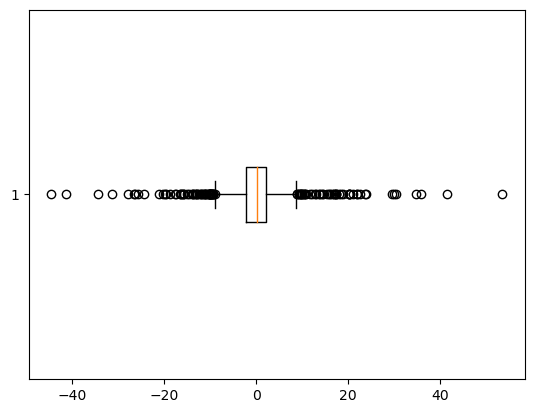

In [173]:
plt.boxplot(comparison['dif'], vert=False)

(array([  1.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   3.,   1.,
          1.,   3.,   3.,   6.,   6.,   9.,  19.,  15.,  39.,  34.,  59.,
        213., 123.,  63.,  23.,  22.,  14.,   6.,   4.,   5.,   7.,   3.,
          6.,   3.,   0.,   0.,   1.,   2.,   0.,   2.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-44.57658101, -42.61645924, -40.65633747, -38.6962157 ,
        -36.73609392, -34.77597215, -32.81585038, -30.85572861,
        -28.89560684, -26.93548507, -24.9753633 , -23.01524153,
        -21.05511976, -19.09499799, -17.13487622, -15.17475445,
        -13.21463268, -11.25451091,  -9.29438914,  -7.33426736,
         -5.37414559,  -3.41402382,  -1.45390205,   0.50621972,
          2.46634149,   4.42646326,   6.38658503,   8.3467068 ,
         10.30682857,  12.26695034,  14.22707211,  16.18719388,
         18.14731565,  20.10743742,  22.06755919,  24.02768097,
         25.98780274,  27.94792451,  29.90804628,  31.86816805,
         33.828289

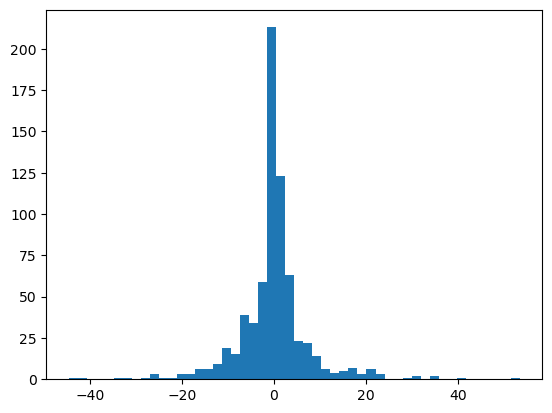

In [175]:
plt.hist(comparison['dif'], bins=50)

_______

# CALCULATE SEGREGATION INDICIES

In [2]:
# create function for calculating proportions

def entropy(df):
    
    # calculate proportion of population
    df['count_white'] = df['count_white'].astype('float')
    df['count_black'] = df['count_black'].astype('float')
    df['count_native'] = df['count_native'].astype('float')
    df['count_asian'] = df['count_asian'].astype('float')
    df['count_hawaiianpacific'] = df['count_hawaiianpacific'].astype('float')
    df['count_other'] = df['count_other'].astype('float')
    df['count_multiracial'] = df['count_multiracial'].astype('float')
    df['count_hispanic_latino'] = df['count_hispanic_latino'].astype('float')
    df['census_count_total'] = df['census_count_total'].astype('float')
    df['naive_count_total'] = df['count_white'] + df['count_black'] + df['count_native'] + df['count_asian'] + df['count_hawaiianpacific'] + df['count_other'] + df['count_multiracial'] + df['count_hispanic_latino']
    
    df['prop_white'] = df['count_white']/ df['naive_count_total']
    df['prop_black'] = df['count_black']/ df['naive_count_total']
    df['prop_native'] = df['count_native']/ df['naive_count_total']
    df['prop_asian'] = df['count_asian']/ df['naive_count_total']
    df['prop_hawaiianpacific'] = df['count_hawaiianpacific']/ df['naive_count_total']
    df['prop_other'] = df['count_other']/ df['naive_count_total']
    df['prop_multiracial'] = df['count_multiracial']/ df['naive_count_total']
    df['prop_hispanic_latino'] = df['count_hispanic_latino']/ df['naive_count_total']
    
    # calculate p*log(p) for each racial group in a attendance zone
    df['log_white'] = df['prop_white'] * np.log(df['prop_white'])
    df['log_black'] = df['prop_black'] * np.log(df['prop_black'])
    df['log_native'] = df['prop_native'] * np.log(df['prop_native'])
    df['log_asian'] = df['prop_asian'] * np.log(df['prop_asian'])
    df['log_hawaiianpacific'] = df['prop_hawaiianpacific'] * np.log(df['prop_hawaiianpacific'])
    df['log_other'] = df['prop_other'] * np.log(df['prop_other'])
    df['log_multiracial'] = df['prop_multiracial'] * np.log(df['prop_multiracial'])
    df['log_hispanic_latino'] = df['prop_hispanic_latino'] * np.log(df['prop_hispanic_latino'])
    
    # if racial group occupies zero proportion of the attendance zone, replace p*log(p) with zero
    df.loc[df.prop_white == 0, 'log_white'] = 0
    df.loc[df.prop_black == 0, 'log_black'] = 0
    df.loc[df.prop_native == 0, 'log_native'] = 0
    df.loc[df.prop_asian == 0, 'log_asian'] = 0
    df.loc[df.prop_hawaiianpacific == 0, 'log_hawaiianpacific'] = 0
    df.loc[df.prop_other == 0, 'log_other'] = 0
    df.loc[df.prop_multiracial == 0, 'log_multiracial'] = 0
    df.loc[df.prop_hispanic_latino == 0, 'log_hispanic_latino'] = 0
    
    df['entropy'] = -1 * (df['log_white'] + df['log_black'] + df['log_native'] + df['log_asian'] + df['log_hawaiianpacific'] + df['log_other'] + df['log_multiracial'] + df['log_hispanic_latino'])

    return df

<b>SCHOOL YEAR 1999-2000</b>

<b>Process Shapefiles</b>

In [ ]:
# CENSUS BLOCKS

In [3]:
# upload census tracts with demographics
census2000_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 1999-2000/Census Data/Clean/2000 Census Blocks with Demographics.shp')

In [4]:
# covert column names to lowercase
census2000_shp = census2000_shp.rename(str.lower, axis='columns')

In [5]:
# rename columns
census2000_shp = census2000_shp.rename(columns={'gisjoin_ce' : 'gisjoin_census',
                                                "count_whit" : "count_white",
                                               'count_blac' : 'count_black',
                                               'count_nati' : 'count_native',
                                               'count_asia' : 'count_asian',
                                               'count_hawa': 'count_hawaiianpacific',
                                               'count_othe': 'count_other',
                                               'count_mult': 'count_multiracial',
                                               'count_hisp' : 'count_hispanic_latino',
                                               'census_cou': 'census_count_total'})

In [6]:
# filter out unecessary columns
census2000_shp = census2000_shp[['gisjoin_census', 'count_white', 'count_black', 'count_native', 'count_asian', 
                                 'count_hawaiianpacific', 'count_other', 'count_multiracial', 'count_hispanic_latino',
                                 'census_count_total', 'geometry']]

In [7]:
# fix invalid census geometries
census2000_shp.geometry = census2000_shp.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)

In [8]:
census2000_shp['census_area'] = census2000_shp.area

In [ ]:
# save file to local directory
# census2000_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 1999-2000/Census Data/Clean/2000 Census Blocks with Demographics.shp',
#                        driver='ESRI Shapefile')

________

In [ ]:
# SABs

In [703]:
# upload SABs shapefile
sabs2000_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 1999-2000/Sal Saporito Data/Clean/3rd Grade Only SABS 1999-2000 - reprojected.shp')

In [704]:
# covert column names to lowercase
sabs2000_shp = sabs2000_shp.rename(str.lower, axis='columns')

In [705]:
# fix broken geometries
sabs2000_shp.geometry = sabs2000_shp.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)

In [706]:
# replace any dropped leading 0s from ccdids
sabs2000_shp['ccd_id'] = sabs2000_shp['ccd_id'].astype(str)
sabs2000_shp.loc[sabs2000_shp['ccd_id'].str.len() == 3, 'ccd_id'] = '00' + sabs2000_shp['ccd_id']
sabs2000_shp.loc[sabs2000_shp['ccd_id'].str.len() == 4, 'ccd_id'] = '0' + sabs2000_shp['ccd_id']

# strip string columns
for column in sabs2000_shp.columns:
    if sabs2000_shp.dtypes[column] == 'object':
        sabs2000_shp[column] = sabs2000_shp[column].str.strip()
        
sabs2000_shp['geoleaid'] = ''
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Baltimore_City_fixed_geometries_reprojected'] = '2400090'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Baltimore_County_fixed_geometries_reprojected'] = '2400120'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Broward_fixed_geometries_reprojected'] = '1200180'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Chicago_fixed_geometries_reprojected'] = '1709930'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Clark_County_fixed_geometries_reprojected'] = '3200060'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Dallas_fixed_geometries_reprojected'] = '4816230'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Detroit_fixed_geometries_reprojected'] = '2601103'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Duval_fixed_geometries_reprojected'] = '1200480'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Fairfax_fixed_geometries_reprojected'] = '5101260'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Hillsborough_fixed_geometries_reprojected'] = '1200870'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Houston_fixed_geometries_reprojected'] = '4823640'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_LA_fixed_geometries_reprojected'] = '0622710'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Miami_Dade_fixed_geometries_reprojected'] = '1200390'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Milwaukee_fixed_geometries_reprojected'] = '5509600'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Montgomery_Cnty_fixed_geometries_reprojected'] = '2400480'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Orange_Cnty_fixed_geometries_reprojected'] = '1201440'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Palm_Beach_fixed_geometries_reprojected'] = '1201500'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Philadelphia_fixed_geometries_reprojected'] = '4218990'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Pinellas_fixed_geometries_reprojected'] = '1201560'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_Prince_George_Cnty_fixed_geometries_reprojected'] = '2400510'
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_San_Diego_fixed_geometries_reprojected'] = '0634320'

In [707]:
# get NYC ncessch ids
ccdschools_2000_nyc = pd.read_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 1999-2000/CCD Schools 1999-2000 - New York.csv',
                                 header=0)

ccdschools_2000_nyc['ccd_id'] = ccdschools_2000_nyc['ccd_id'].astype('str')
ccdschools_2000_nyc['geoleaid'] = ccdschools_2000_nyc['geoleaid'].astype('str')



ccdschools_2000_nyc.loc[ccdschools_2000_nyc['ccd_id'].str.len() == 1, 'ccd_id'] = '0000' + ccdschools_2000_nyc['ccd_id']
ccdschools_2000_nyc.loc[ccdschools_2000_nyc['ccd_id'].str.len() == 2, 'ccd_id'] = '000' + ccdschools_2000_nyc['ccd_id']
ccdschools_2000_nyc.loc[ccdschools_2000_nyc['ccd_id'].str.len() == 3, 'ccd_id'] = '00' + ccdschools_2000_nyc['ccd_id']
ccdschools_2000_nyc.loc[ccdschools_2000_nyc['ccd_id'].str.len() == 4, 'ccd_id'] = '0' + ccdschools_2000_nyc['ccd_id']

ccdschools_2000_nyc = ccdschools_2000_nyc[['ccd_id', 'geoleaid', 'state_name', 'county_name']]


sabs2000_shp = sabs2000_shp.merge(ccdschools_2000_nyc, how='left', on='ccd_id')
sabs2000_shp = sabs2000_shp.rename(columns={'geoleaid_x' : 'geoleaid'})
sabs2000_shp.geoleaid[sabs2000_shp['layer'] == 'elem_NYC_fixed_geometries_reprojected'] = sabs2000_shp['geoleaid_y']
sabs2000_shp = sabs2000_shp.drop(['geoleaid_y'], axis=1)


sabs2000_shp['ncessch'] = sabs2000_shp['geoleaid'] + sabs2000_shp['ccd_id'].astype(str)

In [708]:
# keep only relevant columns
sabs2000_shp = sabs2000_shp[['geoleaid', 'ccd_id', 'ncessch', 'sch_name', 'state_name', 'county_name', 'layer', 'geometry']]

KeyError: "['state_name'] not in index"

In [40]:
# sabs2000_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 1999-2000/Sal Saporito Data/Clean/3rd Grade Only SABS 1999-2000 - reprojected.shx',
#                        driver='ESRI Shapefile')

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_1226/529023458.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sabs2000_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 1999-2000/Sal Saporito Data/Clean/3rd Grade Only SABS 1999-2000 - reprojected.shx',


______

In [ ]:
# PERFORM UNION BETWEEN CENSUS AND SABS FILES

In [1146]:
union2000 = gpd.overlay(sabs2000_shp, census2000_shp, how='intersection', keep_geom_type=False)

In [1147]:
# calculate area of union geographies
union2000['union_area'] = union2000.area

In [1148]:
# calculate weight of union area in SAB
union2000['weight'] = union2000['union_area']/union2000['census_area']

In [1149]:
# convert census counts to float variables
union2000['count_black'] = union2000['count_black'].astype('float')
union2000['count_native'] = union2000['count_native'].astype('float')
union2000['count_asian'] = union2000['count_asian'].astype('float')
union2000['count_hawaiianpacific'] = union2000['count_hawaiianpacific'].astype('float')
union2000['count_other'] = union2000['count_other'].astype('float')
union2000['count_multiracial'] = union2000['count_multiracial'].astype('float')
union2000['count_white'] = union2000['count_white'].astype('float')
union2000['count_hispanic_latino'] = union2000['count_hispanic_latino'].astype('float')
union2000['census_count_total'] = union2000['census_count_total'].astype('float')

In [1150]:
# calculated weighted populations in each union geography

union2000['count_black_weighted'] = union2000['count_black'] * union2000['weight']
union2000['count_native_weighted'] = union2000['count_native'] * union2000['weight']
union2000['count_asian_weighted'] = union2000['count_asian'] * union2000['weight']
union2000['count_hawaiian_weighted'] = union2000['count_hawaiianpacific'] * union2000['weight']
union2000['count_other_weighted'] = union2000['count_other'] * union2000['weight']
union2000['count_multiracial_weighted'] = union2000['count_multiracial'] * union2000['weight']
union2000['count_white_weighted'] = union2000['count_white'] * union2000['weight']
union2000['count_hispanic_weighted'] = union2000['count_hispanic_latino'] * union2000['weight']
union2000['count_total_weighted'] = union2000['census_count_total'] * union2000['weight']

In [1151]:
# aggregate weighted population counts for each attendance area 
union2000 = union2000.groupby(['ncessch', 'geoleaid'])[['count_black_weighted', 'count_native_weighted', 'count_asian_weighted', 
                                                            'count_hawaiian_weighted', 'count_other_weighted', 
                                                            'count_multiracial_weighted', 'count_white_weighted',
                                                            'count_hispanic_weighted', 'count_total_weighted']].sum()

union2000.reset_index(inplace=True)

<b>Calculate Segregation Index</b>

In [1152]:
union2000 = union2000.rename(columns={'count_white_weighted' : 'count_white',
                                                          'count_black_weighted' : 'count_black',
                                                          'count_native_weighted' : 'count_native',
                                                          'count_asian_weighted' : 'count_asian',
                                                          'count_hawaiian_weighted' : 'count_hawaiianpacific',
                                                          'count_other_weighted' : 'count_other', 
                                                          'count_multiracial_weighted' : 'count_multiracial', 
                                                          'count_hispanic_weighted' : 'count_hispanic_latino',
                                                          'count_total_weighted' : 'census_count_total'})

In [1153]:
# calculate SABs' entropies
union2000 = entropy(union2000)


/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core

In [1154]:
# rename entropy column to sab_entropy to distinguish it from the district entropy values
union2000 = union2000.rename(columns={'entropy' : 'sab_entropy'})


In [1155]:
# calculate district entropy

# collapse sabs df by geoleaid to get racial counts for total district
district_entropy_2000 = union2000.groupby('geoleaid')[['count_white', 'count_black', 'count_native', 'count_asian', 
                                              'count_hawaiianpacific', 'count_other', 'count_multiracial',
                                              'count_hispanic_latino', 'census_count_total', 'naive_count_total']].sum()
# make geoleaid a column instead of index
district_entropy_2000.reset_index(inplace=True)

In [1156]:
# calculate average number of third graders in each AZ per district and add it to the district entropy dataframe
avg_az_enrollment00 = union2000.groupby('geoleaid')['census_count_total'].mean()
district_entropy_2000 = district_entropy_2000.merge(avg_az_enrollment00, how='left', on='geoleaid')
district_entropy_2000 = district_entropy_2000.rename(columns={'census_count_total_x' : 'census_count_total',
                                                              'census_count_total_y' : 'district_census_avg_total'})

In [1157]:
# calculate district district entropy
district_entropy_2000 = entropy(district_entropy_2000)

In [1158]:
# rename column names to distinguish them from the sab versions
district_entropy_2000 = district_entropy_2000.rename(columns={'entropy' : 'district_entropy',
                                                   'census_count_total' : 'district_census_count_total',
                                                   'naive_count_total' : 'district_naive_count_total'})



In [1159]:
# keep only relevant columns
district_entropy_2000 = district_entropy_2000[['geoleaid', 'district_entropy', 'district_census_count_total', 'district_naive_count_total', 'district_census_avg_total']]

In [1160]:
# merge district entropy levels onto SAB level entropies so that I can calculate 1 - (sab entropy/district entropy)
union2000 = pd.merge(union2000, district_entropy_2000, how='left', on='geoleaid')

In [1161]:
# calculate information theory index up to the sab level
union2000['H_i'] = 1 - (union2000['sab_entropy'] / union2000['district_entropy']) 
union2000['segregation_index00'] = (union2000['census_count_total'] / union2000['district_census_count_total']) * union2000['H_i']

In [1162]:
# finalize calculation of information theory index by summing up sab values from above at the district level
union2000['n_attendancezones00'] = 1

district_information_index00 = union2000.groupby('geoleaid')[['segregation_index00', 'count_black', 'count_native',
                                                              'count_asian', 'count_hawaiianpacific', 'count_other',
                                                              'count_multiracial', 'count_white', 
                                                              'count_hispanic_latino', 'n_attendancezones00']].sum()

district_information_index00.reset_index(inplace=True)

In [1163]:
# merge district-level features back onto dataset
district_information_index00 = pd.merge(district_information_index00, district_entropy_2000, how='left', on='geoleaid')

In [1164]:
district_information_index00['pblack00'] = district_information_index00['count_black'] / district_information_index00['district_naive_count_total']
district_information_index00['pnative00'] = district_information_index00['count_native'] / district_information_index00['district_naive_count_total']
district_information_index00['pasian00'] = district_information_index00['count_asian'] / district_information_index00['district_naive_count_total']
district_information_index00['phawaiianpacific00'] = district_information_index00['count_hawaiianpacific'] / district_information_index00['district_naive_count_total']
district_information_index00['pother00'] = district_information_index00['count_other'] / district_information_index00['district_naive_count_total']
district_information_index00['pmultiracial00'] = district_information_index00['count_multiracial'] / district_information_index00['district_naive_count_total']
district_information_index00['pwhite00'] = district_information_index00['count_white'] / district_information_index00['district_naive_count_total']
district_information_index00['phispaniclatino00'] = district_information_index00['count_hispanic_latino'] / district_information_index00['district_naive_count_total']

In [1165]:
district_information_index00 = district_information_index00[['geoleaid', 'segregation_index00', 'pblack00', 
                                                             'pnative00', 'pasian00', 'phawaiianpacific00', 
                                                             'pother00', 'pmultiracial00', 'pwhite00',
                                                             'phispaniclatino00', 'n_attendancezones00', 
                                                             'district_entropy', 'district_census_count_total', 
                                                             'district_census_avg_total']]

In [1166]:
# give year specific variable names
district_information_index00 = district_information_index00.rename(columns={'district_entropy' : 'district_entropy00',
                                                                            'district_census_count_total' : 'district_census_count_total00',
                                                                            'district_census_avg_total' : 'district_census_avg_total00'})

In [1167]:
district_information_index00.to_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 1999-2000/Census Data/Finalized Files for Paper/1999-2000 District Segregation.csv')

<b>SCHOOL YEAR 2009-2010</b>

<b>Calculate Segregation Index</b>

In [1168]:
# import sabs file that has demographics merged onto it
sabs_demographics10 = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2009-10/SABS:SABINS/Clean/SABINS/SABINS with demographic data.geojson')

In [1169]:
# import ccd school list to get geoleaids for all the SABS schools
ccdschools10 = pd.read_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2009-10/CCD Schools 2009-2010.csv', header=0)

In [1170]:
# clean the import errors of ccdschools10

# convert variables to correct type
ccdschools10['leaid'] = ccdschools10['leaid'].astype('str')
ccdschools10['geoleaid'] = ccdschools10['geoleaid'].astype('str')

# strip string columns
for column in ccdschools10.columns:
    if ccdschools10.dtypes[column] == 'object':
        ccdschools10[column] = ccdschools10[column].str.strip()

# add leading 0 to geolea, leaid, and school ids where it was chopped off from incorrect variable type
ccdschools10.loc[ccdschools10['geoleaid'].str.len() == 6, 'geoleaid'] = '0' + ccdschools10['geoleaid']
ccdschools10.loc[ccdschools10['leaid'].str.len() == 6, 'leaid'] = '0' + ccdschools10['leaid']

# keep only leaid and geoleaid
ccdschools10 = ccdschools10[['leaid', 'geoleaid', 'state_name', 'county_name']]

# get unique list of leaids
ccdschools10 = ccdschools10.drop_duplicates(subset=['leaid'])

In [1171]:
# merge ccd schools df onto the sabs df
sabs_demographics10 = pd.merge(sabs_demographics10, ccdschools10, how='left', left_on='SDUNIA_g', right_on='leaid')

In [1172]:
# if no geoleaid value, geoleaid = leaid
sabs_demographics10.geoleaid[pd.isna(sabs_demographics10.geoleaid)] = sabs_demographics10['SDUNIA_g']

In [1173]:
# keep only relevant columns
sabs_demographics10 = sabs_demographics10[['geoleaid', 'leaid', 'SDELMA_g', 'SDUNIA_g', 'SDSECA_g', 'STATE', 
                                           'NUMSCHOOLS', 'CENTROID_X', 'CENTROID_Y', 'GISJOIN', 'Magnet09CT', 
                                           'Charter09C', 'Privat09CT', 'Shape_area', 'Shape_len', 'area', 'ns_NCESSCH',
                                           'ns_SABINSI', 'demographics10_black_5_9', 'demographics10_native_5_9', 
                                           'demographics10_asian_5_9', 'demographics10_hawaiianpacific_5_9', 
                                           'demographics10_other_5_9', 'demographics10_multiracial_5_9', 
                                           'demographics10_hispanic_latino_5_9', 'demographics10_white_nhl_5_9', 
                                           'demographics10_total_5_9',]]

# rename columns consistent with what entropy command is looking for 
sabs_demographics10 = sabs_demographics10.rename(columns={'demographics10_white_nhl_5_9' : 'count_white',
                                                          'demographics10_black_5_9' : 'count_black',
                                                          'demographics10_native_5_9' : 'count_native',
                                                          'demographics10_asian_5_9' : 'count_asian',
                                                          'demographics10_hawaiianpacific_5_9' : 'count_hawaiianpacific',
                                                          'demographics10_other_5_9' : 'count_other', 
                                                          'demographics10_multiracial_5_9' : 'count_multiracial', 
                                                          'demographics10_hispanic_latino_5_9' : 'count_hispanic_latino',
                                                          'demographics10_total_5_9' : 'census_count_total'})

# make all column names lower case
sabs_demographics10 = sabs_demographics10.rename(str.lower, axis='columns')

In [1174]:
# calculate SABs' entropies
sabs_demographics10 = entropy(sabs_demographics10)

# rename entropy column to sab_entropy to distinguish it from the district entropy values
sabs_demographics10 = sabs_demographics10.rename(columns={'entropy' : 'sab_entropy'})

/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core

In [1175]:
# calculate district entropy

# collapse sabs df by geoleaid to get racial counts for total district
district_entropy = sabs_demographics10.groupby('geoleaid')[['count_white', 'count_black', 'count_native', 'count_asian', 
                                              'count_hawaiianpacific', 'count_other', 'count_multiracial',
                                              'count_hispanic_latino', 'census_count_total', 'naive_count_total']].sum()

In [1176]:
# calculate average number of third graders in each AZ per district and add it to the district entropy dataframe
avg_az_enrollment10 = sabs_demographics10.groupby('geoleaid')['census_count_total'].mean()
district_entropy = district_entropy.merge(avg_az_enrollment10, how='left', on='geoleaid')
district_entropy = district_entropy.rename(columns={'census_count_total_x' : 'census_count_total',
                                                              'census_count_total_y' : 'district_census_avg_total'})

In [1177]:
# calculate district district entropy
district_entropy = entropy(district_entropy)

/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core

In [1178]:
# rename column names to distinguish them from the sab versions
district_entropy = district_entropy.rename(columns={'entropy' : 'district_entropy',
                                                   'census_count_total' : 'district_census_count_total',
                                                   'naive_count_total' : 'district_naive_count_total'})

In [1179]:
# make geoleaid a column instead of index
district_entropy.reset_index(inplace=True)

In [1180]:
# keep only relevant columns
district_entropy = district_entropy[['geoleaid', 'district_entropy', 'district_census_count_total', 'district_naive_count_total', 'district_census_avg_total']]

In [1181]:
# merge district entropy levels onto SAB level entropies so that I can calculate 1 - (sab entropy/district entropy)
sabs_demographics10 = pd.merge(sabs_demographics10, district_entropy, how='left', on='geoleaid')

In [1182]:
# calculate information theory index up to the sab level
sabs_demographics10['H_i'] = 1 - (sabs_demographics10['sab_entropy'] / sabs_demographics10['district_entropy']) 
sabs_demographics10['segregation_index10'] = (sabs_demographics10['census_count_total'] / sabs_demographics10['district_census_count_total']) * sabs_demographics10['H_i']

In [1183]:
# finalize calculation of information theory index by summing up sab values from above at the district level
sabs_demographics10['n_attendancezones10'] = 1

district_information_index10 = sabs_demographics10.groupby('geoleaid')[['segregation_index10', 'count_black', 'count_native',
                                                              'count_asian', 'count_hawaiianpacific', 'count_other',
                                                              'count_multiracial', 'count_white', 
                                                              'count_hispanic_latino', 'n_attendancezones10']].sum()

district_information_index10.reset_index(inplace=True)

In [1184]:
# merge district-level features back onto dataset
district_information_index10 = pd.merge(district_information_index10, district_entropy, how='left', on='geoleaid')

In [1185]:
district_information_index10['pblack10'] = district_information_index10['count_black'] / district_information_index10['district_naive_count_total']
district_information_index10['pnative10'] = district_information_index10['count_native'] / district_information_index10['district_naive_count_total']
district_information_index10['pasian10'] = district_information_index10['count_asian'] / district_information_index10['district_naive_count_total']
district_information_index10['phawaiianpacific10'] = district_information_index10['count_hawaiianpacific'] / district_information_index10['district_naive_count_total']
district_information_index10['pother10'] = district_information_index10['count_other'] / district_information_index10['district_naive_count_total']
district_information_index10['pmultiracial10'] = district_information_index10['count_multiracial'] / district_information_index10['district_naive_count_total']
district_information_index10['pwhite10'] = district_information_index10['count_white'] / district_information_index10['district_naive_count_total']
district_information_index10['phispaniclatino10'] = district_information_index10['count_hispanic_latino'] / district_information_index10['district_naive_count_total']


In [1186]:
district_information_index10 = district_information_index10[['geoleaid', 'segregation_index10', 'pblack10', 
                                                             'pnative10', 'pasian10', 'phawaiianpacific10', 
                                                             'pother10', 'pmultiracial10', 'pwhite10', 
                                                             'phispaniclatino10', 'n_attendancezones10', 
                                                             'district_entropy', 'district_census_count_total', 
                                                             'district_census_avg_total']]

In [1187]:
# give year specific variable names
district_information_index10 = district_information_index10.rename(columns={'district_entropy' : 'district_entropy10',
                                                                            'district_census_count_total' : 'district_census_count_total10',
                                                                            'district_census_avg_total' : 'district_census_avg_total10'})

In [1188]:
district_information_index10.to_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2009-10/Finalized Files for Paper/2009-10 District Segregation.csv')

<b>SCHOOL YEAR 2010-2011</b>

<b>Process Shapefiles</b>

In [ ]:
# CENSUS BLOCKS

In [225]:
# upload census blocks with demographics
census2011_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2010-11/Census Data/Clean/2010-11 Census Blocks with Demographics.shp')

KeyboardInterrupt: 

In [ ]:
# rename columns
census2011_shp = census2011_shp.rename(columns={'gisjoin_ce' : 'gisjoin_census',
                                               'count_blac' : 'count_black',
                                               'count_nati' : 'count_native',
                                               'count_asia' : 'count_asian',
                                               'count_hawa': 'count_hawaiianpacific',
                                               'count_othe': 'count_other',
                                               'count_mult': 'count_multiracial',
                                               'count_whit' : 'count_white',
                                               'count_hisp': 'count_hispanic_latino',
                                               'census_cou' : 'census_count_total'})

In [12]:
census2011_shp = census2011_shp.to_crs('ESRI:54027')

In [13]:
# validate broken geographies
census2011_shp.geometry = census2011_shp.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)

In [14]:
# calculate area of census blocks
census2011_shp['census_area'] = census2011_shp.area

In [206]:
# save census to local directory
census2011_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2010-11/Census Data/Clean/2010-11 Census Blocks with Demographics.shp',
                       driver='ESRI Shapefile')

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_1226/3241128956.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  census2011_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2010-11/Census Data/Clean/2010-11 Census Blocks with Demographics.shp',


_____

In [15]:
# SABs
sabs2011_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2010-11/SABS:SABINS/Clean/SABS/3rd Grade Only SABS 2010-2011.shp')

In [16]:
sabs2011_shp.geometry = sabs2011_shp.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)

In [17]:
sabs2011_shp = sabs2011_shp[['ncessch', 'schnam', 'leaid', 'geometry']]

In [274]:
# sabs2011_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2010-11/SABS:SABINS/Clean/SABS/3rd Grade Only SABS 2010-2011.shp',
#                        driver='ESRI Shapefile')

______

In [ ]:
# PERFORM UNION BETWEEN CENSUS AND SABS FILES

In [1012]:
union2011 =  gpd.overlay(sabs2011_shp, census2011_shp, how='intersection', keep_geom_type=False)

In [1013]:
# calculate area of union geographies
union2011['union_area'] = union2011.area

In [1014]:
# calculate weight of union area in SAB
union2011['weight'] = union2011['union_area']/union2011['census_area']

In [1015]:
# convert census counts to float variables
union2011['count_black'] = union2011['count_black'].astype('float')
union2011['count_native'] = union2011['count_native'].astype('float')
union2011['count_asian'] = union2011['count_asian'].astype('float')
union2011['count_hawaiianpacific'] = union2011['count_hawaiianpacific'].astype('float')
union2011['count_other'] = union2011['count_other'].astype('float')
union2011['count_multiracial'] = union2011['count_multiracial'].astype('float')
union2011['count_white'] = union2011['count_white'].astype('float')
union2011['count_hispanic_latino'] = union2011['count_hispanic_latino'].astype('float')
union2011['census_count_total'] = union2011['census_count_total'].astype('float')

In [1016]:
# calculated weighted populations in each union geography

union2011['count_black_weighted'] = union2011['count_black'] * union2011['weight']
union2011['count_native_weighted'] = union2011['count_native'] * union2011['weight']
union2011['count_asian_weighted'] = union2011['count_asian'] * union2011['weight']
union2011['count_hawaiian_weighted'] = union2011['count_hawaiianpacific'] * union2011['weight']
union2011['count_other_weighted'] = union2011['count_other'] * union2011['weight']
union2011['count_multiracial_weighted'] = union2011['count_multiracial'] * union2011['weight']
union2011['count_white_weighted'] = union2011['count_white'] * union2011['weight']
union2011['count_hispanic_weighted'] = union2011['count_hispanic_latino'] * union2011['weight']
union2011['count_total_weighted'] = union2011['census_count_total'] * union2011['weight']

In [1017]:
# aggregate weighted population counts for each attendance area 
union2011 = union2011.groupby(['ncessch', 'schnam', 'leaid'])[['count_black_weighted', 'count_native_weighted', 'count_asian_weighted', 
                                                            'count_hawaiian_weighted', 'count_other_weighted', 
                                                            'count_multiracial_weighted', 'count_white_weighted',
                                                            'count_hispanic_weighted', 'count_total_weighted']].sum()

union2011.reset_index(inplace=True)

<b>Calculate Segregation Index</b>

In [1018]:
# import ccd schools file to get geoleaids

ccdschools2011 = pd.read_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2010-11/CCD Schools 2010-2011.csv')

# clean the import errors of ccdschools10

# convert variables to correct type
ccdschools2011['leaid'] = ccdschools2011['leaid'].astype('str')
ccdschools2011['geoleaid'] = ccdschools2011['geoleaid'].astype('str')

# strip string columns
for column in ccdschools2011.columns:
    if ccdschools2011.dtypes[column] == 'object':
        ccdschools2011[column] = ccdschools2011[column].str.strip()

# add leading 0 to geolea, leaid, and school ids where it was chopped off from incorrect variable type
ccdschools2011.loc[ccdschools2011['geoleaid'].str.len() == 6, 'geoleaid'] = '0' + ccdschools2011['geoleaid']
ccdschools2011.loc[ccdschools2011['leaid'].str.len() == 6, 'leaid'] = '0' + ccdschools2011['leaid']

# drop unncessary columns
ccdschools2011 = ccdschools2011[['geoleaid', 'leaid', 'state_name', 'county_name']]


# keep only unique leaids
ccdschools2011 = ccdschools2011.drop_duplicates(subset=['leaid'])

In [1019]:
# merge ccd school files onto the union file
union2011 = union2011.merge(ccdschools2011, how='left', on='leaid')

In [1020]:
# if no geoleaid value, geoleaid = leaid
union2011.geoleaid[pd.isna(union2011.geoleaid)] = union2011['leaid']

In [1021]:
union2011 = union2011.rename(columns={'count_white_weighted' : 'count_white',
                                                          'count_black_weighted' : 'count_black',
                                                          'count_native_weighted' : 'count_native',
                                                          'count_asian_weighted' : 'count_asian',
                                                          'count_hawaiian_weighted' : 'count_hawaiianpacific',
                                                          'count_other_weighted' : 'count_other', 
                                                          'count_multiracial_weighted' : 'count_multiracial', 
                                                          'count_hispanic_weighted' : 'count_hispanic_latino',
                                                          'count_total_weighted' : 'census_count_total'})

In [1022]:
# calculate SABs' entropies
union2011 = entropy(union2011)

/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core

In [1023]:
# rename entropy column to sab_entropy to distinguish it from the district entropy values
union2011 = union2011.rename(columns={'entropy' : 'sab_entropy'})

In [1024]:
# calculate district entropy

# collapse sabs df by geoleaid to get racial counts for total district
district_entropy_2011 = union2011.groupby('geoleaid')[['count_white', 'count_black', 'count_native', 'count_asian', 
                                              'count_hawaiianpacific', 'count_other', 'count_multiracial',
                                              'count_hispanic_latino', 'census_count_total', 'naive_count_total']].sum()

In [1025]:
# calculate average number of third graders in each AZ per district and add it to the district entropy dataframe
avg_az_enrollment11 = union2011.groupby('geoleaid')['census_count_total'].mean()
district_entropy_2011 = district_entropy_2011.merge(avg_az_enrollment11, how='left', on='geoleaid')
district_entropy_2011 = district_entropy_2011.rename(columns={'census_count_total_x' : 'census_count_total',
                                                              'census_count_total_y' : 'district_census_avg_total'})

In [1026]:
# calculate district district entropy
district_entropy_2011 = entropy(district_entropy_2011)

/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core

In [1027]:
# rename column names to distinguish them from the sab versions
district_entropy_2011 = district_entropy_2011.rename(columns={'entropy' : 'district_entropy',
                                                   'census_count_total' : 'district_census_count_total',
                                                   'naive_count_total' : 'district_naive_count_total'})

In [1028]:
# make geoleaid a column instead of index
district_entropy_2011.reset_index(inplace=True)

In [1029]:
# keep only relevant columns
district_entropy_2011 = district_entropy_2011[['geoleaid', 'district_entropy', 'district_census_count_total', 'district_naive_count_total', 'district_census_avg_total']]

In [1030]:
# merge district entropy levels onto SAB level entropies so that I can calculate 1 - (sab entropy/district entropy)
union2011 = pd.merge(union2011, district_entropy_2011, how='left', on='geoleaid')

In [1031]:
# calculate information theory index up to the sab level
union2011['H_i'] = 1 - (union2011['sab_entropy'] / union2011['district_entropy']) 
union2011['segregation_index11'] = (union2011['census_count_total'] / union2011['district_census_count_total']) * union2011['H_i']

In [1032]:
# finalize calculation of information theory index by summing up sab values from above at the district level
union2011['n_attendancezones11'] = 1


district_information_index11 = union2011.groupby('geoleaid')[['segregation_index11', 'count_black', 'count_native',
                                                              'count_asian', 'count_hawaiianpacific', 'count_other',
                                                              'count_multiracial', 'count_white', 
                                                              'count_hispanic_latino', 'n_attendancezones11']].sum()

district_information_index11.reset_index(inplace=True)

In [1033]:
# merge district-level features back onto dataset
district_information_index11 = pd.merge(district_information_index11, district_entropy_2011, how='left', on='geoleaid')

In [1034]:
district_information_index11['pblack11'] = district_information_index11['count_black'] / district_information_index11['district_naive_count_total']
district_information_index11['pnative11'] = district_information_index11['count_native'] / district_information_index11['district_naive_count_total']
district_information_index11['pasian11'] = district_information_index11['count_asian'] / district_information_index11['district_naive_count_total']
district_information_index11['phawaiianpacific11'] = district_information_index11['count_hawaiianpacific'] / district_information_index11['district_naive_count_total']
district_information_index11['pother11'] = district_information_index11['count_other'] / district_information_index11['district_naive_count_total']
district_information_index11['pmultiracial11'] = district_information_index11['count_multiracial'] / district_information_index11['district_naive_count_total']
district_information_index11['pwhite11'] = district_information_index11['count_white'] / district_information_index11['district_naive_count_total']
district_information_index11['phispaniclatino11'] = district_information_index11['count_hispanic_latino'] / district_information_index11['district_naive_count_total']


In [1035]:
district_information_index11 = district_information_index11[['geoleaid', 'segregation_index11', 'pblack11', 
                                                             'pnative11', 'pasian11', 'phawaiianpacific11', 
                                                             'pother11', 'pmultiracial11', 'pwhite11',
                                                             'phispaniclatino11', 'n_attendancezones11', 
                                                             'district_entropy', 'district_census_count_total', 
                                                             'district_census_avg_total']]

In [1036]:
# give year specific variable names
district_information_index11 = district_information_index11.rename(columns={'district_entropy' : 'district_entropy11',
                                                                            'district_census_count_total' : 'district_census_count_total11',
                                                                            'district_census_avg_total' : 'district_census_avg_total11'})

<b>Bias Corrected Segregation Estimates (years with ACS only)</b>

bias-corrected information theory index (segregation) estimates = H - B/2E

where:
<br>
H = biased estimate of information theory index 
<br>
B = (1 - r) / n_bar = (1 - sampling rate of AZs for ACS) / (average number of 3rd graders in district AZs * sampling rate of AZs for ACS)
<br>
according to sean & anne's paper (https://dup.silverchair-cdn.com/dup/Content_public/Journal/demography/55/6/10.1007_s13524-018-0721-4/3/2129reardon.pdf?Expires=2147483647&Signature=Q9LYYNqSxS3cW5lqyu7yWOyXbLKuyRj~DiYKJXO5fnvTMYiNNn15iR6eVHPy4HGAjM4z2YofwJlD5Aly1V~r2ILK4dnvGTREh7M7NI4UTXg7m5v1mWVOSXn3c9ZoFa-hIW3ii-CMla8HIYvJdqoM9~2DoDLM0Ld2CxXSCIyIWVW5v5RbYI6V7hIPJ7Fe14KJ2jqJCqYyTLCtlINHK~GDAynLLbUsDrdHDe03x6HAJzOj~rc78Pz4U7kc0rKuD~gHxs2YqrCyBmyIdCMl9GhbZqbtEkzEDY7QSSZgBCctvh8TtwWAhpFgeriVmqRSvPxFSp-yablTjaLH50mST83LMA__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA) sampling rate is approximately 8%

In [578]:
# calculate debiased segregation scores according to above specifications
# district_information_index11['H*'] = district_information_index11['segregation_index11'] - ((0.92 / (district_information_index11['district_census_avg_total11'] * 0.08)) / (2 * district_information_index11['district_entropy11']))

In [587]:
# any districts who already had segregation scores of 0 or whose debiased scores are below zero --> new debiased score becomes 0
# district_information_index11.loc[(district_information_index11['segregation_index11'] == 0)  | (district_information_index11['H*'] < 0), 'H*'] = 0

In [589]:
# drop biased segregation score column and rename new debiased segregation score column
# district_information_index11 = district_information_index11.drop('segregation_index11', axis=1)
# district_information_index11 = district_information_index11.rename(columns={'H*' : 'segregation_index11'})

In [1039]:
district_information_index11.to_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2010-11/Finalized Files for Paper/2010-11 District Segregation.csv')

<b>SCHOOL YEAR 2011-12</b>

<b>Process Shapefiles</b>

In [ ]:
# CENSUS BLOCKS

In [806]:
census2012_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2011-12/Census Data/Minnesota Census Block Group Demographics/Clean/2011-12 Census Blocks with Demographics.shp')

In [807]:
# rename columns
census2012_shp = census2012_shp.rename(columns={'gisjoin_ce' : 'gisjoin_censusblock',
                                               'count_blac' : 'count_black',
                                               'count_nati' : 'count_native',
                                               'count_asia' : 'count_asian',
                                               'count_hawa': 'count_hawaiianpacific',
                                               'count_othe': 'count_other',
                                               'count_mult': 'count_multiracial',
                                               'count_whit' : 'count_white',
                                               'count_hisp': 'count_hispanic_latino',
                                               'census_cou' : 'census_count_total'})

In [808]:
census2012_shp.geometry = census2012_shp.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)

In [809]:
census2012_shp['census_area'] = census2012_shp.area

In [810]:
# census2012_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2011-12/Census Data/Minnesota Census Block Group Demographics/Clean/2011-12 Census Blocks with Demographics.shp',
#                       driver='ESRI Shapefile')

____

In [ ]:
# SABs

In [811]:
sabs2012_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2011-12/SABINS/Clean/PY_SABINS_1112_03_US_reprojected - fixed geometries.shp')

In [812]:
sabs2012_shp.columns = sabs2012_shp.columns.str.lower()

In [813]:
sabs2012_shp = sabs2012_shp[['sdunia_g', 'gisjoin', 'geometry']]

In [814]:
sabs2012_shp.geometry = sabs2012_shp.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)

In [58]:
# sabs2012_shp.to_file("/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2011-12/SABINS/Clean/PY_SABINS_1112_03_US_reprojected - fixed geometries.shp",
#                        driver='ESRI Shapefile')

____

In [ ]:
# PERFORM UNION BETWEEN CENSUS AND SABS FILES

In [1040]:
union2012 =  gpd.overlay(sabs2012_shp, census2012_shp, how='intersection', keep_geom_type=False)

In [1041]:
# calculate area of union geographies
union2012['union_area'] = union2012.area

In [1042]:
# calculate weight of union area in SAB
union2012['weight'] = union2012['union_area']/union2012['census_area']

In [1043]:
# convert census counts to float variables
union2012['count_black'] = union2012['count_black'].astype('float')
union2012['count_native'] = union2012['count_native'].astype('float')
union2012['count_asian'] = union2012['count_asian'].astype('float')
union2012['count_hawaiianpacific'] = union2012['count_hawaiianpacific'].astype('float')
union2012['count_other'] = union2012['count_other'].astype('float')
union2012['count_multiracial'] = union2012['count_multiracial'].astype('float')
union2012['count_white'] = union2012['count_white'].astype('float')
union2012['count_hispanic_latino'] = union2012['count_hispanic_latino'].astype('float')
union2012['census_count_total'] = union2012['census_count_total'].astype('float')

In [1044]:
# calculated weighted populations in each union geography

union2012['count_black_weighted'] = union2012['count_black'] * union2012['weight']
union2012['count_native_weighted'] = union2012['count_native'] * union2012['weight']
union2012['count_asian_weighted'] = union2012['count_asian'] * union2012['weight']
union2012['count_hawaiian_weighted'] = union2012['count_hawaiianpacific'] * union2012['weight']
union2012['count_other_weighted'] = union2012['count_other'] * union2012['weight']
union2012['count_multiracial_weighted'] = union2012['count_multiracial'] * union2012['weight']
union2012['count_white_weighted'] = union2012['count_white'] * union2012['weight']
union2012['count_hispanic_weighted'] = union2012['count_hispanic_latino'] * union2012['weight']
union2012['count_total_weighted'] = union2012['census_count_total'] * union2012['weight']

In [1045]:
# aggregate weighted population counts for each attendance area 
union2012 = union2012.groupby(['gisjoin', 'sdunia_g'])[['count_black_weighted', 'count_native_weighted', 'count_asian_weighted', 
                                                            'count_hawaiian_weighted', 'count_other_weighted', 
                                                            'count_multiracial_weighted', 'count_white_weighted',
                                                            'count_hispanic_weighted', 'count_total_weighted']].sum()

union2012.reset_index(inplace=True)

<b>Calculate Segregation Index</b>

In [1046]:
# import ccd schools file to get geoleaids

ccdschools2012 = pd.read_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2011-12/CCD Schools 2011-2012.csv')

# clean the import errors of ccdschools10

# convert variables to correct type
ccdschools2012['leaid'] = ccdschools2012['leaid'].astype('str')
ccdschools2012['geoleaid'] = ccdschools2012['geoleaid'].astype('str')

# strip string columns
for column in ccdschools2012.columns:
    if ccdschools2012.dtypes[column] == 'object':
        ccdschools2012[column] = ccdschools2012[column].str.strip()

# add leading 0 to geolea, leaid, and school ids where it was chopped off from incorrect variable type
ccdschools2012.loc[ccdschools2012['geoleaid'].str.len() == 6, 'geoleaid'] = '0' + ccdschools2012['geoleaid']
ccdschools2012.loc[ccdschools2012['leaid'].str.len() == 6, 'leaid'] = '0' + ccdschools2012['leaid']

# drop unncessary columns
ccdschools2012 = ccdschools2012[['geoleaid', 'leaid', 'state_name', 'county_name']]


# keep only unique leaids
ccdschools2012 = ccdschools2012.drop_duplicates(subset=['leaid'])

In [1047]:
# merge ccd school files onto the union file
union2012 = union2012.merge(ccdschools2012, how='left', left_on='sdunia_g',right_on='leaid')

In [1048]:
# if no geoleaid value, geoleaid = leaid
union2012.geoleaid[pd.isna(union2012.geoleaid)] = union2012['sdunia_g']

In [1049]:
union2012 = union2012.rename(columns={'count_white_weighted' : 'count_white',
                                                          'count_black_weighted' : 'count_black',
                                                          'count_native_weighted' : 'count_native',
                                                          'count_asian_weighted' : 'count_asian',
                                                          'count_hawaiian_weighted' : 'count_hawaiianpacific',
                                                          'count_other_weighted' : 'count_other', 
                                                          'count_multiracial_weighted' : 'count_multiracial', 
                                                          'count_hispanic_weighted' : 'count_hispanic_latino',
                                                          'count_total_weighted' : 'census_count_total'})

In [1050]:
# calculate SABs' entropies
union2012 = entropy(union2012)

/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core

In [1051]:
# rename entropy column to sab_entropy to distinguish it from the district entropy values
union2012 = union2012.rename(columns={'entropy' : 'sab_entropy'})

In [1052]:
# calculate district entropy

# collapse sabs df by geoleaid to get racial counts for total district
district_entropy_2012 = union2012.groupby('geoleaid')[['count_white', 'count_black', 'count_native', 'count_asian', 
                                              'count_hawaiianpacific', 'count_other', 'count_multiracial',
                                              'count_hispanic_latino', 'census_count_total', 'naive_count_total']].sum()

In [1053]:
# calculate average number of third graders in each AZ per district and add it to the district entropy dataframe
avg_az_enrollment12 = union2012.groupby('geoleaid')['census_count_total'].mean()
district_entropy_2012 = district_entropy_2012.merge(avg_az_enrollment12, how='left', on='geoleaid')
district_entropy_2012 = district_entropy_2012.rename(columns={'census_count_total_x' : 'census_count_total',
                                                              'census_count_total_y' : 'district_census_avg_total'})

In [1054]:
# calculate district district entropy
district_entropy_2012 = entropy(district_entropy_2012)

/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core

In [1055]:
# rename column names to distinguish them from the sab versions
district_entropy_2012 = district_entropy_2012.rename(columns={'entropy' : 'district_entropy',
                                                   'census_count_total' : 'district_census_count_total',
                                                   'naive_count_total' : 'district_naive_count_total'})

In [1056]:
# make geoleaid a column instead of index
district_entropy_2012.reset_index(inplace=True)

In [1057]:
# keep only relevant columns
district_entropy_2012 = district_entropy_2012[['geoleaid', 'district_entropy', 'district_census_count_total', 'district_naive_count_total', 'district_census_avg_total']]

In [1058]:
# merge district entropy levels onto SAB level entropies so that I can calculate 1 - (sab entropy/district entropy)
union2012 = pd.merge(union2012, district_entropy_2012, how='left', on='geoleaid')

In [1059]:
# calculate information theory index up to the sab level
union2012['H_i'] = 1 - (union2012['sab_entropy'] / union2012['district_entropy']) 
union2012['segregation_index12'] = (union2012['census_count_total'] / union2012['district_census_count_total']) * union2012['H_i']

In [1060]:
# finalize calculation of information theory index by summing up sab values from above at the district level
union2012['n_attendancezones12'] = 1


district_information_index12 = union2012.groupby('geoleaid')[['segregation_index12', 'count_black', 'count_native',
                                                              'count_asian', 'count_hawaiianpacific', 'count_other',
                                                              'count_multiracial', 'count_white', 
                                                              'count_hispanic_latino', 'n_attendancezones12']].sum()

district_information_index12.reset_index(inplace=True)

In [1061]:
# merge district-level features back onto dataset
district_information_index12 = pd.merge(district_information_index12, district_entropy_2012, how='left', on='geoleaid')

In [1062]:
district_information_index12['pblack12'] = district_information_index12['count_black'] / district_information_index12['district_naive_count_total']
district_information_index12['pnative12'] = district_information_index12['count_native'] / district_information_index12['district_naive_count_total']
district_information_index12['pasian12'] = district_information_index12['count_asian'] / district_information_index12['district_naive_count_total']
district_information_index12['phawaiianpacific12'] = district_information_index12['count_hawaiianpacific'] / district_information_index12['district_naive_count_total']
district_information_index12['pother12'] = district_information_index12['count_other'] / district_information_index12['district_naive_count_total']
district_information_index12['pmultiracial12'] = district_information_index12['count_multiracial'] / district_information_index12['district_naive_count_total']
district_information_index12['pwhite12'] = district_information_index12['count_white'] / district_information_index12['district_naive_count_total']
district_information_index12['phispaniclatino12'] = district_information_index12['count_hispanic_latino'] / district_information_index12['district_naive_count_total']

In [1063]:
district_information_index12 = district_information_index12[['geoleaid', 'segregation_index12', 'pblack12', 
                                                             'pnative12', 'pasian12', 'phawaiianpacific12', 
                                                             'pother12', 'pmultiracial12', 'pwhite12', 
                                                             'phispaniclatino12', 'n_attendancezones12', 
                                                             'district_entropy', 'district_census_count_total', 
                                                             'district_census_avg_total']]

In [1064]:
# give year specific variable names
district_information_index12 = district_information_index12.rename(columns={'district_entropy' : 'district_entropy12',
                                                                            'district_census_count_total' : 'district_census_count_total12',
                                                                            'district_census_avg_total' : 'district_census_avg_total12'})

<b>Bias Corrected Segregation Estimates (years with ACS only)</b>

bias-corrected information theory index (segregation) estimates = H - B/2E

where:
<br>
H = biased estimate of information theory index 
<br>
B = (1 - r) / n_bar = (1 - sampling rate of AZs for ACS) / (average number of 3rd graders in district AZs * sampling rate of AZs for ACS)
<br>
according to sean & anne's paper (https://dup.silverchair-cdn.com/dup/Content_public/Journal/demography/55/6/10.1007_s13524-018-0721-4/3/2129reardon.pdf?Expires=2147483647&Signature=Q9LYYNqSxS3cW5lqyu7yWOyXbLKuyRj~DiYKJXO5fnvTMYiNNn15iR6eVHPy4HGAjM4z2YofwJlD5Aly1V~r2ILK4dnvGTREh7M7NI4UTXg7m5v1mWVOSXn3c9ZoFa-hIW3ii-CMla8HIYvJdqoM9~2DoDLM0Ld2CxXSCIyIWVW5v5RbYI6V7hIPJ7Fe14KJ2jqJCqYyTLCtlINHK~GDAynLLbUsDrdHDe03x6HAJzOj~rc78Pz4U7kc0rKuD~gHxs2YqrCyBmyIdCMl9GhbZqbtEkzEDY7QSSZgBCctvh8TtwWAhpFgeriVmqRSvPxFSp-yablTjaLH50mST83LMA__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA) sampling rate is approximately 8%

In [840]:
# calculate debiased segregation scores according to above specifications
# district_information_index12['H*'] = district_information_index12['segregation_index12'] - ((0.92 / (district_information_index12['district_census_avg_total12'] * 0.08)) / (2 * district_information_index12['district_entropy12']))

In [841]:
# any districts who already had segregation scores of 0 or whose debiased scores are below zero --> new debiased score becomes 0
# district_information_index12.loc[(district_information_index12['segregation_index12'] == 0)  | (district_information_index12['H*'] < 0), 'H*'] = 0

In [842]:
# drop biased segregation score column and rename new debiased segregation score column
# district_information_index12 = district_information_index12.drop('segregation_index12', axis=1)
# district_information_index12 = district_information_index12.rename(columns={'H*' : 'segregation_index12'})

In [1067]:
district_information_index12.to_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2011-12/Finalized Files for Paper/2011-12 District Segregation.csv')

<b>SCHOOL YEAR 2013-2014</b>

<b>Process Shapefiles</b>

In [ ]:
# CENSUS BLOCKS

In [46]:
# upload census blocks with demographics
census2014_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2013-14/Census Data/Clean/2013-14 Census Blocks with Demographics.shp')

In [47]:
# convert column headers to lowercase
census2014_shp = census2014_shp.rename(str.lower, axis='columns')


census2014_shp = census2014_shp.rename(columns={'gisjoin_ce' : 'gisjoin_census',
                                               'count_blac' : 'count_black',
                                               'count_nati' : 'count_native',
                                               'count_asia' : 'count_asian',
                                               'count_hawa': 'count_hawaiianpacific',
                                               'count_othe': 'count_other',
                                               'count_mult': 'count_multiracial',
                                               'count_whit' : 'count_white',
                                               'count_hisp': 'count_hispanic_latino',
                                               'census_cou' : 'census_count_total'})

# keep only relevant columns
census2014_shp = census2014_shp[['gisjoin_census', 'count_white', 'count_black', 'count_native', 'count_asian', 
                                 'count_hawaiianpacific', 'count_other', 'count_multiracial', 'count_hispanic_latino',
                                 'census_count_total', 'geometry']]

In [48]:
# fix invalid geometries
census2014_shp.geometry = census2014_shp.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)

In [49]:
census2014_shp['census_area'] = census2014_shp.area

In [727]:
# census2014_shp.to_file("/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2013-14/Census Data/Clean/2013-14 Census Blocks with Demographics.shp",
#                        driver='ESRI Shapefile')

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_83125/3926690282.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  census2014_shp.to_file("/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2013-14/Census Data/Clean/2013-14 Census Blocks with Demographics.shp",


____

In [ ]:
# SABs

In [50]:
sabs2014_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2013-14/SABS/Clean/3rd Grade Only SABS 2013-2014.shp')

In [51]:
# make column headers lowercase 
sabs2014_shp.columns = sabs2014_shp.columns.str.lower()

In [52]:
# drop unncessary columns
sabs2014_shp = sabs2014_shp[['ncessch', 'schnam', 'leaid', 'geometry']]

In [53]:
sabs2014_shp.geometry = sabs2014_shp.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)

In [732]:
# sabs2014_shp.to_file("/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2013-14/SABS/Clean/3rd Grade Only SABS 2013-2014.shp",
#                        driver='ESRI Shapefile')

____

In [ ]:
# PERFORM UNION BETWEEN CENSUS AND SABS FILES

In [1068]:
union2014 = gpd.overlay(sabs2014_shp, census2014_shp, how='intersection', keep_geom_type=False)

In [1069]:
# calculate area of union geographies
union2014['union_area'] = union2014.area

In [1070]:
# calculate weight of union area in SAB
union2014['weight'] = union2014['union_area']/union2014['census_area']

In [1071]:
# convert census counts to float variables
union2014['count_black'] = union2014['count_black'].astype('float')
union2014['count_native'] = union2014['count_native'].astype('float')
union2014['count_asian'] = union2014['count_asian'].astype('float')
union2014['count_hawaiianpacific'] = union2014['count_hawaiianpacific'].astype('float')
union2014['count_other'] = union2014['count_other'].astype('float')
union2014['count_multiracial'] = union2014['count_multiracial'].astype('float')
union2014['count_white'] = union2014['count_white'].astype('float')
union2014['count_hispanic_latino'] = union2014['count_hispanic_latino'].astype('float')
union2014['census_count_total'] = union2014['census_count_total'].astype('float')

In [1072]:
# calculated weighted populations in each union geography

union2014['count_black_weighted'] = union2014['count_black'] * union2014['weight']
union2014['count_native_weighted'] = union2014['count_native'] * union2014['weight']
union2014['count_asian_weighted'] = union2014['count_asian'] * union2014['weight']
union2014['count_hawaiian_weighted'] = union2014['count_hawaiianpacific'] * union2014['weight']
union2014['count_other_weighted'] = union2014['count_other'] * union2014['weight']
union2014['count_multiracial_weighted'] = union2014['count_multiracial'] * union2014['weight']
union2014['count_white_weighted'] = union2014['count_white'] * union2014['weight']
union2014['count_hispanic_weighted'] = union2014['count_hispanic_latino'] * union2014['weight']
union2014['count_total_weighted'] = union2014['census_count_total'] * union2014['weight']

In [1073]:
# aggregate weighted population counts for each attendance area 
union2014 = union2014.groupby(['ncessch', 'schnam', 'leaid'])[['count_black_weighted', 'count_native_weighted', 
                                                               'count_asian_weighted', 
                                                            'count_hawaiian_weighted', 'count_other_weighted', 
                                                            'count_multiracial_weighted', 'count_white_weighted',
                                                            'count_hispanic_weighted', 'count_total_weighted']].sum()

union2014.reset_index(inplace=True)

<b>Calculate Segregation Index</b>

In [1074]:
# import ccd schools file to get geoleaids

ccdschools2014 = pd.read_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2013-14/CCD Schools 2013-2014.csv')

In [1075]:
# clean the import errors of ccdschools10

# convert variables to correct type
ccdschools2014['leaid'] = ccdschools2014['leaid'].astype('str')
ccdschools2014['geoleaid'] = ccdschools2014['geoleaid'].astype('str')



# strip string columns
for column in ccdschools2014.columns:
    if ccdschools2014.dtypes[column] == 'object':
        ccdschools2014[column] = ccdschools2014[column].str.strip()

# add leading 0 to geolea, leaid, and school ids where it was chopped off from incorrect variable type
ccdschools2014.loc[ccdschools2014['geoleaid'].str.len() == 6, 'geoleaid'] = '0' + ccdschools2014['geoleaid']
ccdschools2014.loc[ccdschools2014['leaid'].str.len() == 6, 'leaid'] = '0' + ccdschools2014['leaid']

# drop unncessary columns
ccdschools2014 = ccdschools2014[['geoleaid', 'leaid', 'state_name', 'county_name']]


# keep only unique leaids
ccdschools2014 = ccdschools2014.drop_duplicates(subset=['leaid'])

In [1076]:
# merge ccd school files onto the union file
union2014 = union2014.merge(ccdschools2014, how='left', on='leaid')

In [1077]:
# if no geoleaid value, geoleaid = leaid
union2014.geoleaid[pd.isna(union2014.geoleaid)] = union2014['leaid']

In [1078]:
union2014 = union2014.rename(columns={'count_white_weighted' : 'count_white',
                                                          'count_black_weighted' : 'count_black',
                                                          'count_native_weighted' : 'count_native',
                                                          'count_asian_weighted' : 'count_asian',
                                                          'count_hawaiian_weighted' : 'count_hawaiianpacific',
                                                          'count_other_weighted' : 'count_other', 
                                                          'count_multiracial_weighted' : 'count_multiracial', 
                                                          'count_hispanic_weighted' : 'count_hispanic_latino',
                                                          'count_total_weighted' : 'census_count_total'})

In [1079]:
# calculate SABs' entropies
union2014 = entropy(union2014)

/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core

In [1080]:
# rename entropy column to sab_entropy to distinguish it from the district entropy values
union2014 = union2014.rename(columns={'entropy' : 'sab_entropy'})

In [1081]:
# calculate district entropy

# collapse sabs df by geoleaid to get racial counts for total district
district_entropy_2014 = union2014.groupby('geoleaid')[['count_white', 'count_black', 'count_native', 'count_asian', 
                                              'count_hawaiianpacific', 'count_other', 'count_multiracial',
                                              'count_hispanic_latino', 'census_count_total', 'naive_count_total']].sum()

In [1082]:
# calculate average number of third graders in each AZ per district and add it to the district entropy dataframe
avg_az_enrollment14 = union2014.groupby('geoleaid')['census_count_total'].mean()
district_entropy_2014 = district_entropy_2014.merge(avg_az_enrollment14, how='left', on='geoleaid')
district_entropy_2014 = district_entropy_2014.rename(columns={'census_count_total_x' : 'census_count_total',
                                                              'census_count_total_y' : 'district_census_avg_total'})

In [1083]:
# calculate district district entropy
district_entropy_2014 = entropy(district_entropy_2014)

/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core

In [1084]:
# rename column names to distinguish them from the sab versions
district_entropy_2014 = district_entropy_2014.rename(columns={'entropy' : 'district_entropy',
                                                   'census_count_total' : 'district_census_count_total',
                                                   'naive_count_total' : 'district_naive_count_total'})

In [1085]:
# make geoleaid a column instead of index
district_entropy_2014.reset_index(inplace=True)

In [1086]:
# keep only relevant columns
district_entropy_2014 = district_entropy_2014[['geoleaid', 'district_entropy', 'district_census_count_total', 'district_naive_count_total', 'district_census_avg_total']]

In [1087]:
# merge district entropy levels onto SAB level entropies so that I can calculate 1 - (sab entropy/district entropy)
union2014 = pd.merge(union2014, district_entropy_2014, how='left', on='geoleaid')

In [1088]:
# calculate information theory index up to the sab level
union2014['H_i'] = 1 - (union2014['sab_entropy'] / union2014['district_entropy']) 
union2014['segregation_index14'] = (union2014['census_count_total'] / union2014['district_census_count_total']) * union2014['H_i']

In [1089]:
# finalize calculation of information theory index by summing up sab values from above at the district level
union2014['n_attendancezones14'] = 1


district_information_index14 = union2014.groupby('geoleaid')[['segregation_index14', 'count_black', 'count_native',
                                                              'count_asian', 'count_hawaiianpacific', 'count_other',
                                                              'count_multiracial', 'count_white', 
                                                              'count_hispanic_latino', 'n_attendancezones14']].sum()

district_information_index14.reset_index(inplace=True)

In [1102]:
district_information_index14.loc[district_information_index14['segregation_index14'] < 0, 'segregation_index14'] = 0

In [1090]:
# merge district-level features back onto dataset
district_information_index14 = pd.merge(district_information_index14, district_entropy_2014, how='left', on='geoleaid')

In [1091]:
district_information_index14['pblack14'] = district_information_index14['count_black'] / district_information_index14['district_naive_count_total']
district_information_index14['pnative14'] = district_information_index14['count_native'] / district_information_index14['district_naive_count_total']
district_information_index14['pasian14'] = district_information_index14['count_asian'] / district_information_index14['district_naive_count_total']
district_information_index14['phawaiianpacific14'] = district_information_index14['count_hawaiianpacific'] / district_information_index14['district_naive_count_total']
district_information_index14['pother14'] = district_information_index14['count_other'] / district_information_index14['district_naive_count_total']
district_information_index14['pmultiracial14'] = district_information_index14['count_multiracial'] / district_information_index14['district_naive_count_total']
district_information_index14['pwhite14'] = district_information_index14['count_white'] / district_information_index14['district_naive_count_total']
district_information_index14['phispaniclatino14'] = district_information_index14['count_hispanic_latino'] / district_information_index14['district_naive_count_total']

In [1092]:
district_information_index14 = district_information_index14[['geoleaid', 'segregation_index14', 'pblack14', 
                                                             'pnative14', 'pasian14', 'phawaiianpacific14', 
                                                             'pother14', 'pmultiracial14', 'pwhite14', 
                                                             'phispaniclatino14', 'n_attendancezones14', 
                                                             'district_entropy', 'district_census_count_total', 
                                                             'district_census_avg_total']]

In [1093]:
# give year specific variable names
district_information_index14 = district_information_index14.rename(columns={'district_entropy' : 'district_entropy14',
                                                                            'district_census_count_total' : 'district_census_count_total14',
                                                                            'district_census_avg_total' : 'district_census_avg_total14'})

<b>Bias Corrected Segregation Estimates (years with ACS only)</b>

bias-corrected information theory index (segregation) estimates = H - B/2E

where:
<br>
H = biased estimate of information theory index 
<br>
B = (1 - r) / n_bar = (1 - sampling rate of AZs for ACS) / (average number of 3rd graders in district AZs * sampling rate of AZs for ACS)
<br>
according to sean & anne's paper (https://dup.silverchair-cdn.com/dup/Content_public/Journal/demography/55/6/10.1007_s13524-018-0721-4/3/2129reardon.pdf?Expires=2147483647&Signature=Q9LYYNqSxS3cW5lqyu7yWOyXbLKuyRj~DiYKJXO5fnvTMYiNNn15iR6eVHPy4HGAjM4z2YofwJlD5Aly1V~r2ILK4dnvGTREh7M7NI4UTXg7m5v1mWVOSXn3c9ZoFa-hIW3ii-CMla8HIYvJdqoM9~2DoDLM0Ld2CxXSCIyIWVW5v5RbYI6V7hIPJ7Fe14KJ2jqJCqYyTLCtlINHK~GDAynLLbUsDrdHDe03x6HAJzOj~rc78Pz4U7kc0rKuD~gHxs2YqrCyBmyIdCMl9GhbZqbtEkzEDY7QSSZgBCctvh8TtwWAhpFgeriVmqRSvPxFSp-yablTjaLH50mST83LMA__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA) sampling rate is approximately 8%

In [656]:
# calculate debiased segregation scores according to above specifications
# district_information_index14['H*'] = district_information_index14['segregation_index14'] - ((0.92 / (district_information_index14['district_census_avg_total14'] * 0.08)) / (2 * district_information_index14['district_entropy14']))

In [664]:
# any districts who already had segregation scores of 0 or whose debiased scores are below zero --> new debiased score becomes 0
# district_information_index14.loc[(district_information_index14['segregation_index14'] == 0)  | (district_information_index14['H*'] < 0), 'H*'] = 0

In [666]:
# drop biased segregation score column and rename new debiased segregation score column
# district_information_index14 = district_information_index14.drop('segregation_index14', axis=1)
# district_information_index14 = district_information_index14.rename(columns={'H*' : 'segregation_index14'})

In [1104]:
district_information_index14.to_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2013-14/Finalized Files for Paper/2013-14 District Segregation.csv')

<b>SCHOOL YEAR 2015-2016</b>

<b>Fix Census Block Geometries</b>

In [ ]:
# CENSUS BLOCK GROUPS

In [65]:
# upload census with demographics
census2016_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2015-16/Census Data/Clean/2015-16 Census Blocks with Demographics.shp')

In [66]:
# convert column headers to lowercase
census2016_shp = census2016_shp.rename(str.lower, axis='columns')


census2016_shp = census2016_shp.rename(columns={'gisjoin_ce' : 'gisjoin_census',
                                               'count_blac' : 'count_black',
                                               'count_nati' : 'count_native',
                                               'count_asia' : 'count_asian',
                                               'count_hawa': 'count_hawaiianpacific',
                                               'count_othe': 'count_other',
                                               'count_mult': 'count_multiracial',
                                               'count_whit' : 'count_white',
                                               'count_hisp': 'count_hispanic_latino',
                                               'census_cou' : 'census_count_total'})
# keep only relevant fields
census2016_shp = census2016_shp[['gisjoin_census', 'count_white', 'count_black', 'count_native', 'count_asian', 
                                 'count_hawaiianpacific', 'count_other', 'count_multiracial', 'count_hispanic_latino',
                                 'census_count_total', 'geometry']]


In [67]:
# fix invalid geometries
census2016_shp.geometry = census2016_shp.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)

In [68]:
census2016_shp['census_area'] = census2016_shp.area

In [ ]:
# census2016_shp.to_file("/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2015-16/Census Data/Clean/2015-16 Census Blocks with Demographics.shp",
#                        driver='ESRI Shapefile')

_______

In [ ]:
# SABs

In [69]:
sabs2016_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2015-16/SABS/Clean/3rd Grade Only SABS 2015-2016.shp')

In [70]:
# convert column headers to lowercase
sabs2016_shp = sabs2016_shp.rename(str.lower, axis='columns')

In [71]:
sabs2016_shp.geometry = sabs2016_shp.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)

In [72]:
# drop unncessary columns
sabs2016_shp = sabs2016_shp[['ncessch', 'schnam', 'leaid', 'geometry']]

In [98]:
# sabs2016_shp.to_file("/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2015-16/SABS/Clean/3rd Grade Only SABS 2015-2016.shp",
#                        driver='ESRI Shapefile')

______

In [ ]:
# PERFORM UNION BETWEEN CENSUS AND SABS FILES

In [1105]:
union2016 = gpd.overlay(sabs2016_shp, census2016_shp, how='intersection', keep_geom_type=False)

In [1106]:
# calculate area of union geographies
union2016['union_area'] = union2016.area

In [1107]:
# calculate weight of union area in SAB
union2016['weight'] = union2016['union_area']/union2016['census_area']

In [1108]:
# convert census counts to float variables
union2016['count_black'] = union2016['count_black'].astype('float')
union2016['count_native'] = union2016['count_native'].astype('float')
union2016['count_asian'] = union2016['count_asian'].astype('float')
union2016['count_hawaiianpacific'] = union2016['count_hawaiianpacific'].astype('float')
union2016['count_other'] = union2016['count_other'].astype('float')
union2016['count_multiracial'] = union2016['count_multiracial'].astype('float')
union2016['count_white'] = union2016['count_white'].astype('float')
union2016['count_hispanic_latino'] = union2016['count_hispanic_latino'].astype('float')
union2016['census_count_total'] = union2016['census_count_total'].astype('float')

In [1109]:
# calculated weighted populations in each union geography

union2016['count_black_weighted'] = union2016['count_black'] * union2016['weight']
union2016['count_native_weighted'] = union2016['count_native'] * union2016['weight']
union2016['count_asian_weighted'] = union2016['count_asian'] * union2016['weight']
union2016['count_hawaiian_weighted'] = union2016['count_hawaiianpacific'] * union2016['weight']
union2016['count_other_weighted'] = union2016['count_other'] * union2016['weight']
union2016['count_multiracial_weighted'] = union2016['count_multiracial'] * union2016['weight']
union2016['count_white_weighted'] = union2016['count_white'] * union2016['weight']
union2016['count_hispanic_weighted'] = union2016['count_hispanic_latino'] * union2016['weight']
union2016['count_total_weighted'] = union2016['census_count_total'] * union2016['weight']

In [1110]:
# aggregate weighted population counts for each attendance area 
union2016 = union2016.groupby(['ncessch', 'schnam', 'leaid'])[['count_black_weighted', 'count_native_weighted', 'count_asian_weighted', 
                                                            'count_hawaiian_weighted', 'count_other_weighted', 
                                                            'count_multiracial_weighted', 'count_white_weighted',
                                                            'count_hispanic_weighted', 'count_total_weighted']].sum()

union2016.reset_index(inplace=True)

<b>Calculate Segregation Index</b>

In [1111]:
# import ccd schools file to get geoleaids

ccdschools2016 = pd.read_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2015-16/CCD Schools 2015-2016.csv')

In [1112]:
# clean the import errors of ccdschools10

# convert variables to correct type
ccdschools2016['leaid'] = ccdschools2016['leaid'].astype('str')
ccdschools2016['geoleaid'] = ccdschools2016['geoleaid'].astype('str')



# strip string columns
for column in ccdschools2016.columns:
    if ccdschools2016.dtypes[column] == 'object':
        ccdschools2016[column] = ccdschools2016[column].str.strip()

# add leading 0 to geolea, leaid, and school ids where it was chopped off from incorrect variable type
ccdschools2016.loc[ccdschools2016['geoleaid'].str.len() == 6, 'geoleaid'] = '0' + ccdschools2016['geoleaid']
ccdschools2016.loc[ccdschools2016['leaid'].str.len() == 6, 'leaid'] = '0' + ccdschools2016['leaid']

# drop unncessary columns
ccdschools2016 = ccdschools2016[['geoleaid', 'leaid', 'state_name', 'county_name']]


# keep only unique leaids
ccdschools2016 = ccdschools2016.drop_duplicates(subset=['leaid'])

In [1113]:
# merge ccd school files onto the union file
union2016 = union2016.merge(ccdschools2016, how='left', on='leaid')

In [1114]:
# if no geoleaid value, geoleaid = leaid
union2016.geoleaid[pd.isna(union2016.geoleaid)] = union2016['leaid']

In [1115]:
union2016 = union2016.rename(columns={'count_white_weighted' : 'count_white',
                                                          'count_black_weighted' : 'count_black',
                                                          'count_native_weighted' : 'count_native',
                                                          'count_asian_weighted' : 'count_asian',
                                                          'count_hawaiian_weighted' : 'count_hawaiianpacific',
                                                          'count_other_weighted' : 'count_other', 
                                                          'count_multiracial_weighted' : 'count_multiracial', 
                                                          'count_hispanic_weighted' : 'count_hispanic_latino',
                                                          'count_total_weighted' : 'census_count_total'})

In [1116]:
# calculate SABs' entropies
union2016 = entropy(union2016)

/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core

In [1117]:
# rename entropy column to sab_entropy to distinguish it from the district entropy values
union2016 = union2016.rename(columns={'entropy' : 'sab_entropy'})

In [1118]:
# calculate district entropy

# collapse sabs df by geoleaid to get racial counts for total district
district_entropy_2016 = union2016.groupby('geoleaid')[['count_white', 'count_black', 'count_native', 'count_asian', 
                                              'count_hawaiianpacific', 'count_other', 'count_multiracial',
                                              'count_hispanic_latino', 'census_count_total', 'naive_count_total']].sum()

In [1119]:
# calculate average number of third graders in each AZ per district and add it to the district entropy dataframe
avg_az_enrollment16 = union2016.groupby('geoleaid')['census_count_total'].mean()
district_entropy_2016 = district_entropy_2016.merge(avg_az_enrollment16, how='left', on='geoleaid')
district_entropy_2016 = district_entropy_2016.rename(columns={'census_count_total_x' : 'census_count_total',
                                                              'census_count_total_y' : 'district_census_avg_total'})

In [1120]:
# calculate district district entropy
district_entropy_2016 = entropy(district_entropy_2016)

/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lacm/opt/anaconda3/lib/python3.9/site-packages/pandas/core

In [1121]:
# rename column names to distinguish them from the sab versions
district_entropy_2016 = district_entropy_2016.rename(columns={'entropy' : 'district_entropy',
                                                   'census_count_total' : 'district_census_count_total',
                                                   'naive_count_total' : 'district_naive_count_total'})

In [1122]:
# make geoleaid a column instead of index
district_entropy_2016.reset_index(inplace=True)

In [1123]:
# keep only relevant columns
district_entropy_2016 = district_entropy_2016[['geoleaid', 'district_entropy', 'district_census_count_total', 'district_naive_count_total', 'district_census_avg_total']]

In [1124]:
# merge district entropy levels onto SAB level entropies so that I can calculate 1 - (sab entropy/district entropy)
union2016 = pd.merge(union2016, district_entropy_2016, how='left', on='geoleaid')

In [1125]:
# calculate information theory index up to the sab level
union2016['H_i'] = 1 - (union2016['sab_entropy'] / union2016['district_entropy']) 
union2016['test'] = union2016['sab_entropy'] / union2016['district_entropy']
union2016['segregation_index16'] = (union2016['census_count_total'] / union2016['district_census_count_total']) * union2016['H_i']

In [1126]:
# finalize calculation of information theory index by summing up sab values from above at the district level

union2016['n_attendancezones16'] = 1

district_information_index16 = union2016.groupby('geoleaid')[['segregation_index16', 'count_black', 'count_native',
                                                              'count_asian', 'count_hawaiianpacific', 'count_other',
                                                              'count_multiracial', 'count_white', 
                                                              'count_hispanic_latino', 'n_attendancezones16']].sum()

district_information_index16.reset_index(inplace=True)

In [1132]:
district_information_index16.loc[district_information_index16['segregation_index16'] < 0, 'segregation_index16'] = 0

In [1127]:
# merge district-level features back onto dataset
district_information_index16 = pd.merge(district_information_index16, district_entropy_2016, how='left', on='geoleaid')

In [1128]:
district_information_index16['pblack16'] = district_information_index16['count_black'] / district_information_index16['district_naive_count_total']
district_information_index16['pnative16'] = district_information_index16['count_native'] / district_information_index16['district_naive_count_total']
district_information_index16['pasian16'] = district_information_index16['count_asian'] / district_information_index16['district_naive_count_total']
district_information_index16['phawaiianpacific16'] = district_information_index16['count_hawaiianpacific'] / district_information_index16['district_naive_count_total']
district_information_index16['pother16'] = district_information_index16['count_other'] / district_information_index16['district_naive_count_total']
district_information_index16['pmultiracial16'] = district_information_index16['count_multiracial'] / district_information_index16['district_naive_count_total']
district_information_index16['pwhite16'] = district_information_index16['count_white'] / district_information_index16['district_naive_count_total']
district_information_index16['phispaniclatino16'] = district_information_index16['count_hispanic_latino'] / district_information_index16['district_naive_count_total']

In [1129]:
district_information_index16 = district_information_index16[['geoleaid', 'segregation_index16', 'pblack16', 
                                                             'pnative16', 'pasian16', 'phawaiianpacific16', 
                                                             'pother16', 'pmultiracial16', 'pwhite16', 
                                                             'phispaniclatino16', 'n_attendancezones16', 
                                                             'district_entropy', 'district_census_count_total', 
                                                             'district_census_avg_total']]

In [1130]:
# give year specific variable names
district_information_index16 = district_information_index16.rename(columns={'district_entropy' : 'district_entropy16',
                                                                            'district_census_count_total' : 'district_census_count_total16',
                                                                            'district_census_avg_total' : 'district_census_avg_total16'})

<b>Bias Corrected Segregation Estimates (years with ACS only)</b>

bias-corrected information theory index (segregation) estimates = H - B/2E

where:
<br>
H = biased estimate of information theory index 
<br>
B = (1 - r) / n_bar = (1 - sampling rate of AZs for ACS) / (average number of 3rd graders in district AZs * sampling rate of AZs for ACS)
<br>
according to sean & anne's paper (https://dup.silverchair-cdn.com/dup/Content_public/Journal/demography/55/6/10.1007_s13524-018-0721-4/3/2129reardon.pdf?Expires=2147483647&Signature=Q9LYYNqSxS3cW5lqyu7yWOyXbLKuyRj~DiYKJXO5fnvTMYiNNn15iR6eVHPy4HGAjM4z2YofwJlD5Aly1V~r2ILK4dnvGTREh7M7NI4UTXg7m5v1mWVOSXn3c9ZoFa-hIW3ii-CMla8HIYvJdqoM9~2DoDLM0Ld2CxXSCIyIWVW5v5RbYI6V7hIPJ7Fe14KJ2jqJCqYyTLCtlINHK~GDAynLLbUsDrdHDe03x6HAJzOj~rc78Pz4U7kc0rKuD~gHxs2YqrCyBmyIdCMl9GhbZqbtEkzEDY7QSSZgBCctvh8TtwWAhpFgeriVmqRSvPxFSp-yablTjaLH50mST83LMA__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA) sampling rate is approximately 8%

In [684]:
# calculate debiased segregation scores according to above specifications
# district_information_index16['H*'] = district_information_index16['segregation_index16'] - ((0.92 / (district_information_index16['district_census_avg_total16'] * 0.08)) / (2 * district_information_index16['district_entropy16']))

In [692]:
# any districts who already had segregation scores of 0 or whose debiased scores are below zero --> new debiased score becomes 0
# district_information_index16.loc[(district_information_index16['segregation_index16'] == 0)  | (district_information_index16['H*'] < 0), 'H*'] = 0

In [697]:
# drop biased segregation score column and rename new debiased segregation score column
# district_information_index16 = district_information_index16.drop('segregation_index16', axis=1)
# district_information_index16 = district_information_index16.rename(columns={'H*' : 'segregation_index16'})

In [1134]:
district_information_index16.to_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2015-16/Finalized Files for Paper/2015-16 District Segregation.csv')


# FULL SEGREGATION INDEX DATASET

In [2]:
# full_segregation_index_covariates = pd.read_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Deliverables/Full Segregation Index with Covariates.csv')

In [16]:
full_segregation_index_long_covars = pd.read_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Deliverables/Full Segregation Index with Covariates - Long.csv')

<b>Wide Format</b>

In [1189]:
full_segregation_index = pd.DataFrame()

In [1190]:
full_segregation_index = pd.merge(district_information_index00, district_information_index10, how='outer', on='geoleaid')

In [1192]:
# merge datasets
full_segregation_index = pd.merge(full_segregation_index, district_information_index11, how='outer', on='geoleaid')


In [1193]:
full_segregation_index = pd.merge(full_segregation_index, district_information_index12, how='outer', on='geoleaid')

In [1194]:
full_segregation_index = pd.merge(full_segregation_index, district_information_index14, how='outer', on='geoleaid')

In [1195]:
full_segregation_index = pd.merge(full_segregation_index, district_information_index16, how='outer', on='geoleaid')

In [1196]:
full_segregation_index[['segregation_index00', 'segregation_index10', 'segregation_index11', 'segregation_index12',
                       'segregation_index14', 'segregation_index16']].describe()

,segregation_index00,segregation_index10,segregation_index11,segregation_index12,segregation_index14,segregation_index16
count,22.000000,5924.000000,7759.000000,337.000000,10758.000000,11304.000000
mean,0.199789,0.008369,0.017638,0.042220,0.059681,0.065207
std,0.109181,0.031748,0.071487,0.091357,0.114565,0.120253
min,0.077417,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.114358,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.163232,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.249695,0.000000,0.000000,0.000000,0.070043,0.092058
max,0.418573,0.454597,0.629144,0.572832,0.987784,0.949664


In [1200]:
full_segregation_index[full_segregation_index.n_attendancezones11 > 1]['segregation_index11'].describe()

count    547.000000
mean       0.250187
std        0.119687
min        0.000000
25%        0.172084
50%        0.268929
75%        0.326402
max        0.629144
Name: segregation_index11, dtype: float64

In [1201]:
full_segregation_index.to_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Deliverables/Full Segregation Index.csv')

In [1202]:
# import court order data from 2021
courtorders2021 = pd.read_excel('/Users/lacm/Documents/Stanford/*Capstone Research/district_court_order_data_feb2021.xlsx', header=0)

# convert variables to correct type
courtorders2021['leaid'] = courtorders2021['leaid'].astype('str')


# strip string columns
for column in courtorders2021.columns:
    if courtorders2021.dtypes[column] == 'object':
        courtorders2021[column] = courtorders2021[column].str.strip()

# add leading 0 to geolea, leaid, and school ids where it was chopped off from incorrect variable type
courtorders2021.loc[courtorders2021['leaid'].str.len() == 6, 'leaid'] = '0' + courtorders2021['leaid']

courtorders2021 = courtorders2021[['leaid','distname', 'countyname', 'region', 'south', 'status_2020', 'yrdiss_2020', 
                                   'ffall_2020', 'hew_case', 'consent_decree', 'ncases', 'charter', 'tot90', 'blk90',
                                   'pblk90', 'leaname', 'coname']]


In [1203]:
full_segregation_index_covariates = full_segregation_index.merge(courtorders2021, how='left', left_on='geoleaid', right_on='leaid')

In [1204]:
full_segregation_index_covariates['court_ordered'] = 1
full_segregation_index_covariates.court_ordered[((full_segregation_index_covariates['status_2020'] == 'never under order') | (full_segregation_index_covariates['status_2020'] == 'missing status') | pd.isna(full_segregation_index_covariates['status_2020']))] = 0

In [1205]:
# if dismissed by 1999-2000 school year
full_segregation_index_covariates['disby2000'] = 'never ordered'
full_segregation_index_covariates.disby2000[(full_segregation_index_covariates['court_ordered'] == 1) & (full_segregation_index_covariates['ffall_2020'] <= 1999)] = 'released'
full_segregation_index_covariates.disby2000[(full_segregation_index_covariates['court_ordered'] == 1) & (full_segregation_index_covariates['ffall_2020'] > 1999)] = 'under order'

# if dismissed by 2009-2010 school year
full_segregation_index_covariates['disby2010'] = 'never ordered'
full_segregation_index_covariates.disby2010[(full_segregation_index_covariates['court_ordered'] == 1) & (full_segregation_index_covariates['ffall_2020'] <= 2009)] = 'released'
full_segregation_index_covariates.disby2010[(full_segregation_index_covariates['court_ordered'] == 1) & (full_segregation_index_covariates['ffall_2020'] > 2009)] = 'under order'

# if dismissed by 2010-2011 school year
full_segregation_index_covariates['disby2011'] = 'never ordered'
full_segregation_index_covariates.disby2011[(full_segregation_index_covariates['court_ordered'] == 1) & (full_segregation_index_covariates['ffall_2020'] <= 2010)] = 'released'
full_segregation_index_covariates.disby2011[(full_segregation_index_covariates['court_ordered'] == 1) & (full_segregation_index_covariates['ffall_2020'] > 2010)] = 'under order'

# if dismissed by 2012-2012 school year
full_segregation_index_covariates['disby2012'] = 'never ordered'
full_segregation_index_covariates.disby2012[(full_segregation_index_covariates['court_ordered'] == 1) & (full_segregation_index_covariates['ffall_2020'] <= 2011)] = 'released'
full_segregation_index_covariates.disby2012[(full_segregation_index_covariates['court_ordered'] == 1) & (full_segregation_index_covariates['ffall_2020'] > 2011)] = 'under order'

# if dismissed by 2013-2014 school year
full_segregation_index_covariates['disby2014'] = 'never ordered'
full_segregation_index_covariates.disby2014[(full_segregation_index_covariates['court_ordered'] == 1) & (full_segregation_index_covariates['ffall_2020'] <= 2013)] = 'released'
full_segregation_index_covariates.disby2014[(full_segregation_index_covariates['court_ordered'] == 1) & (full_segregation_index_covariates['ffall_2020'] > 2013)] = 'under order'

# if dismissed by 2015-2016 school year
full_segregation_index_covariates['disby2016'] = 'never ordered'
full_segregation_index_covariates.disby2016[(full_segregation_index_covariates['court_ordered'] == 1) & (full_segregation_index_covariates['ffall_2020'] <= 2015)] = 'released'
full_segregation_index_covariates.disby2016[(full_segregation_index_covariates['court_ordered'] == 1) & (full_segregation_index_covariates['ffall_2020'] > 2015)] = 'under order'

In [1206]:
# calculate net change in segregation at the district level
full_segregation_index_covariates['first_year'] = full_segregation_index_covariates['segregation_index00']
full_segregation_index_covariates.first_year[(pd.isna(full_segregation_index_covariates['first_year'])) & (pd.notna(full_segregation_index_covariates['segregation_index10']))] = full_segregation_index_covariates['segregation_index10']
full_segregation_index_covariates.first_year[(pd.isna(full_segregation_index_covariates['first_year'])) & (pd.notna(full_segregation_index_covariates['segregation_index11']))] = full_segregation_index_covariates['segregation_index11']
full_segregation_index_covariates.first_year[(pd.isna(full_segregation_index_covariates['first_year'])) & (pd.notna(full_segregation_index_covariates['segregation_index12']))] = full_segregation_index_covariates['segregation_index12']
full_segregation_index_covariates.first_year[(pd.isna(full_segregation_index_covariates['first_year'])) & (pd.notna(full_segregation_index_covariates['segregation_index14']))] = full_segregation_index_covariates['segregation_index14']

full_segregation_index_covariates['last_year'] = full_segregation_index_covariates['segregation_index16']
full_segregation_index_covariates.last_year[(pd.isna(full_segregation_index_covariates['last_year'])) & (pd.notna(full_segregation_index_covariates['segregation_index14']))] = full_segregation_index_covariates['segregation_index14']
full_segregation_index_covariates.last_year[(pd.isna(full_segregation_index_covariates['last_year'])) & (pd.notna(full_segregation_index_covariates['segregation_index12']))] = full_segregation_index_covariates['segregation_index12']
full_segregation_index_covariates.last_year[(pd.isna(full_segregation_index_covariates['last_year'])) & (pd.notna(full_segregation_index_covariates['segregation_index11']))] = full_segregation_index_covariates['segregation_index11']
full_segregation_index_covariates.last_year[(pd.isna(full_segregation_index_covariates['last_year'])) & (pd.notna(full_segregation_index_covariates['segregation_index10']))] = full_segregation_index_covariates['segregation_index10']

full_segregation_index_covariates['net_change_segregation'] = full_segregation_index_covariates['first_year'] - full_segregation_index_covariates['last_year']


In [1207]:
full_segregation_index_covariates = full_segregation_index_covariates.drop(['first_year', 'last_year'], axis=1)


In [1208]:
# upload seda covariates
seda = pd.read_csv('/Users/lacm/Documents/Stanford/3. Spring 2022/EDS Seminar/EDS Group Project/school-integration-project/data/(COVARIATES) District - Pooled - Cohort.csv', header=0)

# convert variables to correct type
seda['sedalea'] = seda['sedalea'].astype('str')


# strip string columns
for column in seda.columns:
    if seda.dtypes[column] == 'object':
        seda[column] = seda[column].str.strip()

# add leading 0 to geolea, leaid, and school ids where it was chopped off from incorrect variable type
seda.loc[seda['sedalea'].str.len() == 6, 'sedalea'] = '0' + seda['sedalea']

# give proper casing to district names
seda['sedaleaname'] = seda['sedaleaname'].str.title() 

In [1209]:
# merge seda data into segregation dataset

full_segregation_index_covariates = full_segregation_index_covariates.merge(seda, how='left', left_on='geoleaid', right_on='sedalea')

In [1210]:
full_segregation_index_covariates.to_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Deliverables/Full Segregation Index with Covariates.csv')

<b>Long Format</b>

In [1211]:
district_information_index00_copy = district_information_index00
district_information_index10_copy = district_information_index10
district_information_index11_copy = district_information_index11
district_information_index12_copy = district_information_index12
district_information_index14_copy = district_information_index14
district_information_index16_copy = district_information_index16

In [1212]:
district_information_index00_copy.columns = district_information_index00_copy.columns.str.replace(r'\d+', '')
district_information_index00_copy['year'] = 2000

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_21509/415174823.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  district_information_index00_copy.columns = district_information_index00_copy.columns.str.replace(r'\d+', '')


In [1213]:
district_information_index10_copy.columns = district_information_index10_copy.columns.str.replace(r'\d+', '')
district_information_index10_copy['year'] = 2010

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_21509/3005818188.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  district_information_index10_copy.columns = district_information_index10_copy.columns.str.replace(r'\d+', '')


In [1214]:
district_information_index11_copy.columns = district_information_index11_copy.columns.str.replace(r'\d+', '')
district_information_index11_copy['year'] = 2011

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_21509/4050045241.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  district_information_index11_copy.columns = district_information_index11_copy.columns.str.replace(r'\d+', '')


In [1215]:
district_information_index12_copy.columns = district_information_index12_copy.columns.str.replace(r'\d+', '')
district_information_index12_copy['year'] = 2012

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_21509/172349762.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  district_information_index12_copy.columns = district_information_index12_copy.columns.str.replace(r'\d+', '')


In [1216]:
district_information_index14_copy.columns = district_information_index14_copy.columns.str.replace(r'\d+', '')
district_information_index14_copy['year'] = 2014

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_21509/2011528966.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  district_information_index14_copy.columns = district_information_index14_copy.columns.str.replace(r'\d+', '')


In [1217]:
district_information_index16_copy.columns = district_information_index16_copy.columns.str.replace(r'\d+', '')
district_information_index16_copy['year'] = 2016

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_21509/785158699.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  district_information_index16_copy.columns = district_information_index16_copy.columns.str.replace(r'\d+', '')


In [1218]:
full_segregation_index_long = pd.concat([district_information_index00_copy, district_information_index10_copy, 
                                         district_information_index11_copy, district_information_index12_copy, 
                                         district_information_index14_copy, district_information_index16_copy])

In [1220]:
full_segregation_index_long = full_segregation_index_long[['geoleaid', 'year', 'n_attendancezones', 
                                                           'segregation_index', 'pblack', 'pnative', 'pasian', 
                                                           'phawaiianpacific', 'pother', 'pmultiracial', 'pwhite',
                                                           'phispaniclatino', 'district_entropy', 
                                                           'district_census_count_total', 'district_census_avg_total']]



In [1221]:
full_segregation_index_long = full_segregation_index_long.sort_values(by=['geoleaid', 'year'])



In [1222]:
full_segregation_index_long.to_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Deliverables/Full Segregation Index - Long.csv')

In [1223]:
# merge court order data
full_segregation_index_long_covars = full_segregation_index_long.merge(courtorders2021, how='left', left_on='geoleaid', right_on='leaid')

In [1224]:
full_segregation_index_long_covars['court_ordered'] = 1
full_segregation_index_long_covars.court_ordered[((full_segregation_index_long_covars['status_2020'] == 'never under order') | (full_segregation_index_long_covars['status_2020'] == 'missing status') | pd.isna(full_segregation_index_long_covars['status_2020']))] = 0

In [1225]:
full_segregation_index_long_covars['court_status'] = 'never ordered'



In [1226]:
full_segregation_index_long_covars.court_status[full_segregation_index_long_covars['year'] - 1 >= full_segregation_index_long_covars['ffall_2020']] = 'dismissed'

In [1227]:
full_segregation_index_long_covars.court_status[(full_segregation_index_long_covars['year'] - 1 < full_segregation_index_long_covars['ffall_2020']) | (full_segregation_index_long_covars['status_2020'] == 'not dismissed')] = 'under order'

In [1228]:
full_segregation_index_long_covars = full_segregation_index_long_covars.merge(seda, how='left', left_on='geoleaid', right_on='sedalea')

In [1229]:
full_segregation_index_long_covars.to_csv('/Users/lacm/Documents/Stanford/*Capstone Research/Deliverables/Full Segregation Index with Covariates - Long.csv')

<b>Append Segregation Indices to District Shapefiles</b>

<b>1999-2000</b>

In [926]:
districts2000_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 1999-2000/School Districts (NHGIS)/US_sd_uni_2000_tl10.shp')

In [928]:
districts2000_shp = districts2000_shp[['GISJOIN', 'STATEFP00', 'UNSDLEA00', 'UNSDIDFP00', 'NAME00', 'LSAD00',
       'LOGRADE00', 'HIGRADE00', 'MTFCC00', 'SDTYP00', 'FUNCSTAT00', 'ALAND00',
       'AWATER00', 'INTPTLAT00', 'INTPTLON00', 'Shape_Leng', 'Shape_Area',
       'geometry']]

In [929]:
# fix for district (detroit) with mismatching leaids with file
district_information_index00_copy = district_information_index00
district_information_index00_copy.geoleaid[district_information_index00_copy['geoleaid'] == '2601103'] = '2612000'

In [930]:
districts2000_shp = districts2000_shp.merge(district_information_index00_copy, how='outer', left_on='UNSDIDFP00', right_on='geoleaid')

In [931]:
districts2000_shp['bin'] = 1
districts2000_shp.bin[(districts2000_shp['segregation_index'] >= 0.2500001) & (districts2000_shp['segregation_index'] <= 0.50)] = 2
districts2000_shp.bin[(districts2000_shp['segregation_index'] >= 0.5000001) & (districts2000_shp['segregation_index'] <= 0.75)] = 3
districts2000_shp.bin[(districts2000_shp['segregation_index'] >= 0.7500001) & (districts2000_shp['segregation_index'] <= 1)] = 4

In [932]:
districts2000_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 1999-2000/School Districts (NHGIS)/US_sd_uni_2000_tl10.shp',
                       driver='ESRI Shapefile')

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_21509/4191416123.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  districts2000_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 1999-2000/School Districts (NHGIS)/US_sd_uni_2000_tl10.shp',


<b>2009-10</b>

In [1100]:
districts2010_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2009-10/School Districts (NCES)/schooldistrict_sy0910_tl10.shp')

In [1099]:
# five districts don't merge.. not fixing
districts2010_shp = districts2010_shp.merge(district_information_index10, how='outer', left_on='GEOID10', right_on='geoleaid')


In [1101]:
# filter out rows that don't merge
districts2010_shp = districts2010_shp[pd.notna(districts2010_shp['GEOID10'])]

In [1227]:
districts2010_shp['bin'] = 1
districts2010_shp.bin[(districts2010_shp['segregatio'] >= 0.2500001) & (districts2010_shp['segregatio'] <= 0.50)] = 2
districts2010_shp.bin[(districts2010_shp['segregatio'] >= 0.5000001) & (districts2010_shp['segregatio'] <= 0.75)] = 3
districts2010_shp.bin[(districts2010_shp['segregatio'] >= 0.7500001) & (districts2010_shp['segregatio'] <= 1)] = 4

In [1260]:
districts2010_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2009-10/School Districts (NCES)/schooldistrict_sy0910_tl10.shp',
                       driver='ESRI Shapefile')

<b>2010-11</b>

In [1230]:
districts2011_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2010-11/School Districts (NHGIS)/US_sd_uni_2011.shp')

In [1231]:
districts2011_shp = districts2011_shp[['STATEFP', 'UNSDLEA', 'GEOID', 'NAME', 'LSAD', 'LOGRADE', 'HIGRADE',
       'MTFCC', 'SDTYP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'GISJOIN', 'Shape_area', 'Shape_len', 'geometry']]

In [1232]:
# strip string columns
for column in districts2011_shp.columns:
    if districts2011_shp.dtypes[column] == 'object':
        districts2011_shp[column] = districts2011_shp[column].str.strip()

In [1233]:
# ugh 1654 districts don't merge
districts2011_shp = districts2011_shp.merge(district_information_index11, how='outer', left_on='GEOID', right_on='geoleaid')

In [1234]:
districts2011_shp['bin'] = 1
districts2011_shp.bin[(districts2011_shp['segregation_index'] >= 0.2500001) & (districts2011_shp['segregation_index'] <= 0.50)] = 2
districts2011_shp.bin[(districts2011_shp['segregation_index'] >= 0.5000001) & (districts2011_shp['segregation_index'] <= 0.75)] = 3
districts2011_shp.bin[(districts2011_shp['segregation_index'] >= 0.7500001) & (districts2011_shp['segregation_index'] <= 1)] = 4

In [1235]:
districts2011_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2010-11/School Districts (NHGIS)/US_sd_uni_2011.shp',
                       driver='ESRI Shapefile')

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_21509/1242089259.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  districts2011_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2010-11/School Districts (NHGIS)/US_sd_uni_2011.shp',


<b>2011-12</b>

In [1236]:
districts2012_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2011-12/School Districts (NCES)/schooldistrict_sy1112_tl13.shp')

In [1237]:
districts2012_shp = gpd.GeoDataFrame(districts2012_shp[['STATEFP', 'SCSDLEA', 'GEOID', 'NAME', 'LSAD', 'LOGRADE', 'HIGRADE',
       'MTFCC', 'SDTYP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'ELSDLEA', 'UNSDLEA', 'geometry']])

In [1238]:
districts2012_shp = districts2012_shp.merge(district_information_index12, how='outer', left_on='GEOID', right_on='geoleaid')

In [1239]:
districts2012_shp['bin'] = 1
districts2012_shp.bin[(districts2012_shp['segregation_index'] >= 0.2500001) & (districts2012_shp['segregation_index'] <= 0.50)] = 2
districts2012_shp.bin[(districts2012_shp['segregation_index'] >= 0.5000001) & (districts2012_shp['segregation_index'] <= 0.75)] = 3
districts2012_shp.bin[(districts2012_shp['segregation_index'] >= 0.7500001) & (districts2012_shp['segregation_index'] <= 1)] = 4

In [1240]:
districts2012_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2011-12/School Districts (NCES)/schooldistrict_sy1112_tl13.shp',
                       driver='ESRI Shapefile')

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_21509/903162909.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  districts2012_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2011-12/School Districts (NCES)/schooldistrict_sy1112_tl13.shp',


<b>2013-14</b>

In [1241]:
districts2014_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2013-14/School Districts (NCES)/schooldistrict_sy1314_tl15.shp')

In [1242]:
districts2014_shp = districts2014_shp[['STATEFP', 'SCSDLEA', 'GEOID', 'NAME', 'LSAD', 'LOGRADE', 'HIGRADE',
       'MTFCC', 'SDTYP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'ELSDLEA', 'UNSDLEA', 'geometry']]

In [1243]:
# 35 don't merge
districts2014_shp = districts2014_shp.merge(district_information_index14, how='outer', left_on='GEOID', right_on='geoleaid')

In [1244]:
# filter out rows that don't merge
districts2014_shp = districts2014_shp[pd.notna(districts2014_shp['GEOID'])]

In [1245]:
districts2014_shp['bin'] = 1
districts2014_shp.bin[(districts2014_shp['segregation_index'] >= 0.2500001) & (districts2014_shp['segregation_index'] <= 0.50)] = 2
districts2014_shp.bin[(districts2014_shp['segregation_index'] >= 0.5000001) & (districts2014_shp['segregation_index'] <= 0.75)] = 3
districts2014_shp.bin[(districts2014_shp['segregation_index'] >= 0.7500001) & (districts2014_shp['segregation_index'] <= 1)] = 4

In [1246]:
districts2014_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2013-14/School Districts (NCES)/schooldistrict_sy1314_tl15.shp',
                       driver='ESRI Shapefile')

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_21509/955364544.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  districts2014_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2013-14/School Districts (NCES)/schooldistrict_sy1314_tl15.shp',


<b>2015-16</b>

In [1247]:
districts2016_shp = gpd.read_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2015-16/School Districts (NCES)/schooldistrict_sy1516_tl17.shp')

In [1248]:
districts2016_shp = districts2016_shp[['STATEFP', 'GEOID', 'NAME', 'LSAD', 'LOGRADE', 'HIGRADE', 'MTFCC',
       'SDTYP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'ELSDLEA', 'UNSDLEA', 'SCSDLEA', 'geometry']]

In [1249]:
# 34 don't merge
districts2016_shp = districts2016_shp.merge(district_information_index16, how='outer', left_on='GEOID', right_on='geoleaid')

In [1250]:
# filter out rows that don't merge
districts2016_shp = districts2016_shp[pd.notna(districts2016_shp['GEOID'])]

In [1251]:
districts2016_shp['bin'] = 1
districts2016_shp.bin[(districts2016_shp['segregation_index'] >= 0.2500001) & (districts2016_shp['segregation_index'] <= 0.50)] = 2
districts2016_shp.bin[(districts2016_shp['segregation_index'] >= 0.5000001) & (districts2016_shp['segregation_index'] <= 0.75)] = 3
districts2016_shp.bin[(districts2016_shp['segregation_index'] >= 0.7500001) & (districts2016_shp['segregation_index'] <= 1)] = 4

In [1252]:
districts2016_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2015-16/School Districts (NCES)/schooldistrict_sy1516_tl17.shp',
                       driver='ESRI Shapefile')

/var/folders/f_/y82bl01510z6_6b9mz3cg6br0000gn/T/ipykernel_21509/3377585400.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  districts2016_shp.to_file('/Users/lacm/Documents/Stanford/*Capstone Research/Data/SY 2015-16/School Districts (NCES)/schooldistrict_sy1516_tl17.shp',
